## Model Training

In [1]:

'''
#Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

import os
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

dropout1 = 0.25
dropout2 = 0.25
dropout3 = 0.5
learning_rate = 0.0001
decay_rate = 1e-6
batch_size = 32
num_classes = 10
epochs = 25
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout1))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout2))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(dropout3))
model.add(Dense(num_classes, activation='softmax', name='predictions'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=learning_rate, decay=decay_rate)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Using TensorFlow backend.


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 208s 4ms/step - loss: 1.7915 - accuracy: 0.3435 - val_loss: 1.5310 - val_accuracy: 0.4415
Epoch 2/25
50000/50000 [==============================] - 213s 4ms/step - loss: 1.4917 - accuracy: 0.4584 - val_loss: 1.4031 - val_accuracy: 0.4932
Epoch 3/25
50000/50000 [==============================] - 210s 4ms/step - loss: 1.3484 - accuracy: 0.5162 - val_loss: 1.3653 - val_accuracy: 0.5143
Epoch 4/25
50000/50000 [==============================] - 207s 4ms/step - loss: 1.2509 - accuracy: 0.5535 - val_loss: 1.1738 - val_accuracy: 0.5888
Epoch 5/25
50000/50000 [==============================] - 173s 3ms/step - loss: 1.1706 - accuracy: 0.5851 - val_loss: 1.0833 - val_accuracy: 0.6225
Epoch 6/25
50000/50000 [==============================

## Activation Maximization Visualization

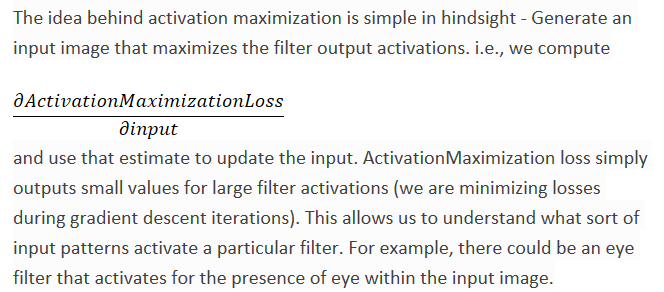

For better understanding, please see the link below:
https://github.com/raghakot/keras-vis/blob/master/examples/mnist/activation_maximization.ipynb



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


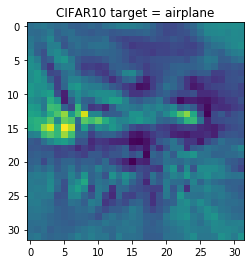

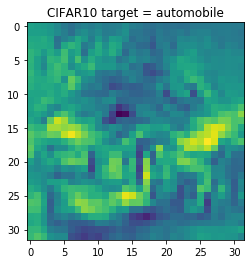

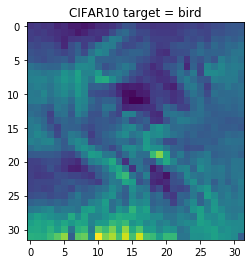

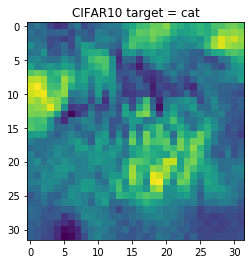

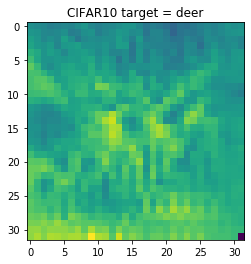

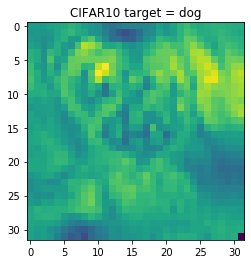

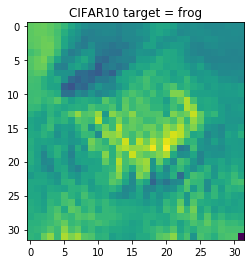

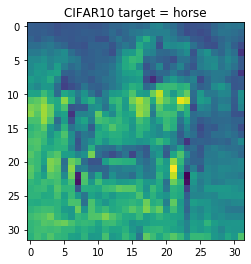

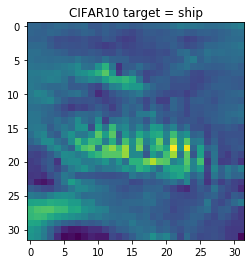

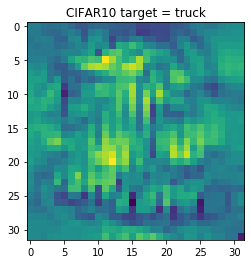

In [2]:
from vis.visualization import visualize_activation
from vis.utils import utils
from vis.input_modifiers import Jitter
import matplotlib.pyplot as plt

# Find the index of the to be visualized layer above
layer_index = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_index].activation = keras.activations.linear
model = utils.apply_modifications(model)  

# Classes to visualize
classes_to_visualize = [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ]
classes = {
  0: 'airplane',
  1: 'automobile',
  2: 'bird',
  3: 'cat',
  4: 'deer',
  5: 'dog',
  6: 'frog',
  7: 'horse',
  8: 'ship',
  9: 'truck'
}

# Visualize
for number_to_visualize in classes_to_visualize:
  visualization = visualize_activation(model, layer_index, filter_indices=number_to_visualize, input_range=(0., 1.), 
                                       tv_weight=1, lp_norm_weight=0.)
  plt.imshow(visualization[..., 0])
  plt.title(f'CIFAR10 target = {classes[number_to_visualize]}')
  plt.show()

## Saliency Map visualization
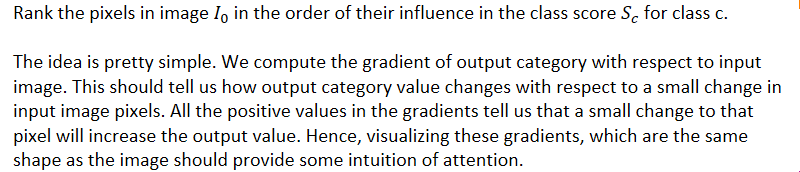

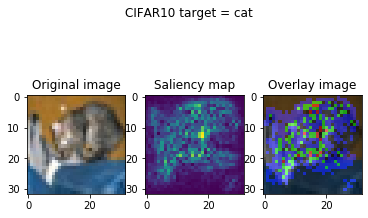

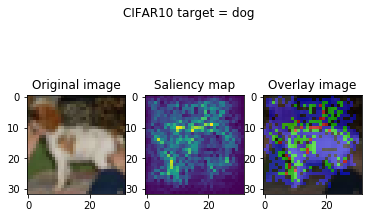

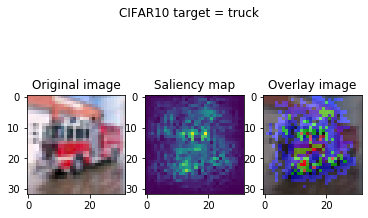

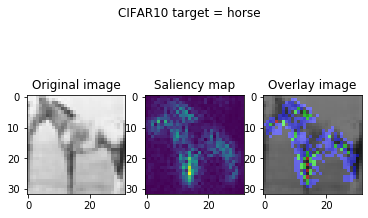

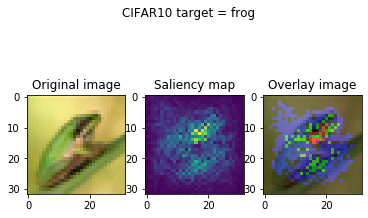

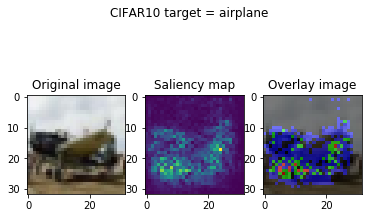

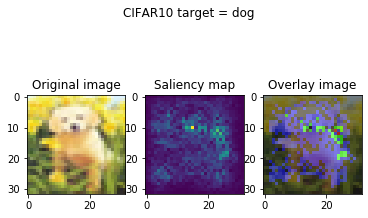

In [3]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Find the index of the to be visualized layer above
layer_index = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_index].activation = keras.activations.linear
model = utils.apply_modifications(model)  

# Numbers to visualize
indices_to_visualize = [ 0, 12, 38, 83, 112, 74, 190 ]

# Visualize
for index_to_visualize in indices_to_visualize:
  # Get input
  input_image = x_test[index_to_visualize]
  # Class object
  classes = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
  }
  input_class = np.argmax(y_test[index_to_visualize])
  input_class_name = classes[input_class]
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 3)
  # Generate visualization
  visualization = visualize_saliency(model, layer_index, filter_indices=input_class, seed_input=input_image, 
                                     backprop_modifier='guided', keepdims=False)
  axes[0].imshow(input_image) 
  axes[0].set_title('Original image')
  axes[1].imshow(visualization)
  axes[1].set_title('Saliency map')
  jet_heatmap = np.uint8(cm.jet(visualization)[..., :3])
  plt.imshow(overlay(input_image, jet_heatmap, alpha=0.5))
#   axes[2].imshow(visualization, cmap='jet') 
  axes[2].set_title('Overlay image')
  fig.suptitle(f'CIFAR10 target = {input_class_name}')
  plt.show()

## Class Activation Map Visualization

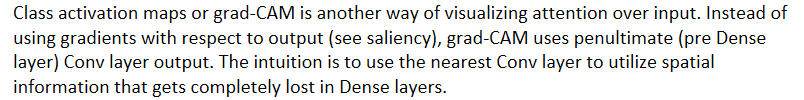

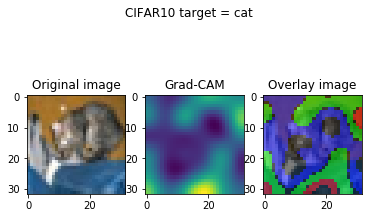

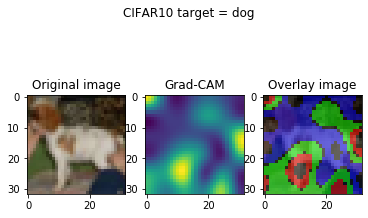

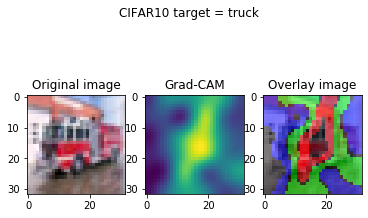

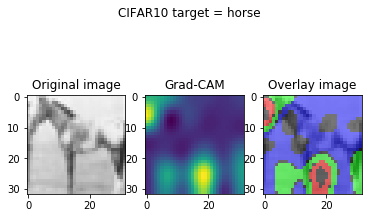

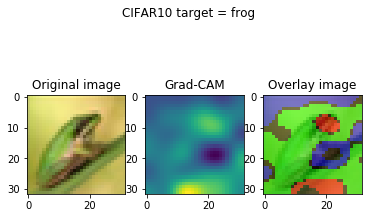

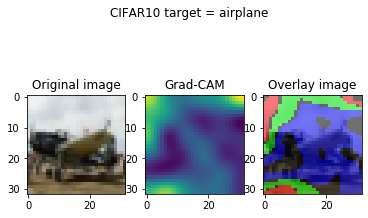

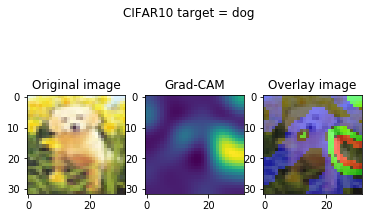

In [4]:
# =============================================
# Grad-CAM code
# =============================================
from vis.visualization import visualize_cam, overlay
from vis.utils import utils
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Find the index of the to be visualized layer above
layer_index = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_index].activation = keras.activations.linear
model = utils.apply_modifications(model)  

# Numbers to visualize
indices_to_visualize = [ 0, 12, 38, 83, 112, 74, 190 ]

# Visualize
for index_to_visualize in indices_to_visualize:
  # Get input
  input_image = x_test[index_to_visualize]
  # Class object
  classes = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
  }
  input_class = np.argmax(y_test[index_to_visualize])
  input_class_name = classes[input_class]
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 3)
  # Generate visualization
  visualization = visualize_cam(model, layer_index, filter_indices=input_class, seed_input=input_image, 
                                     backprop_modifier='guided')
  axes[0].imshow(input_image) 
  axes[0].set_title('Original image')
  axes[1].imshow(visualization)
  axes[1].set_title('Grad-CAM')
  jet_heatmap = np.uint8(cm.jet(visualization)[..., :3])
  plt.imshow(overlay(input_image, jet_heatmap, alpha=0.5))
#   axes[2].imshow(visualization, cmap='jet') 
  axes[2].set_title('Overlay image')
  fig.suptitle(f'CIFAR10 target = {input_class_name}')
  plt.show()

## Feature Maps Visualization

conv2d_1_4/BiasAdd:0 (1, 32, 32, 32) 


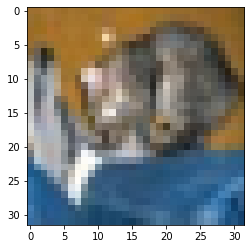

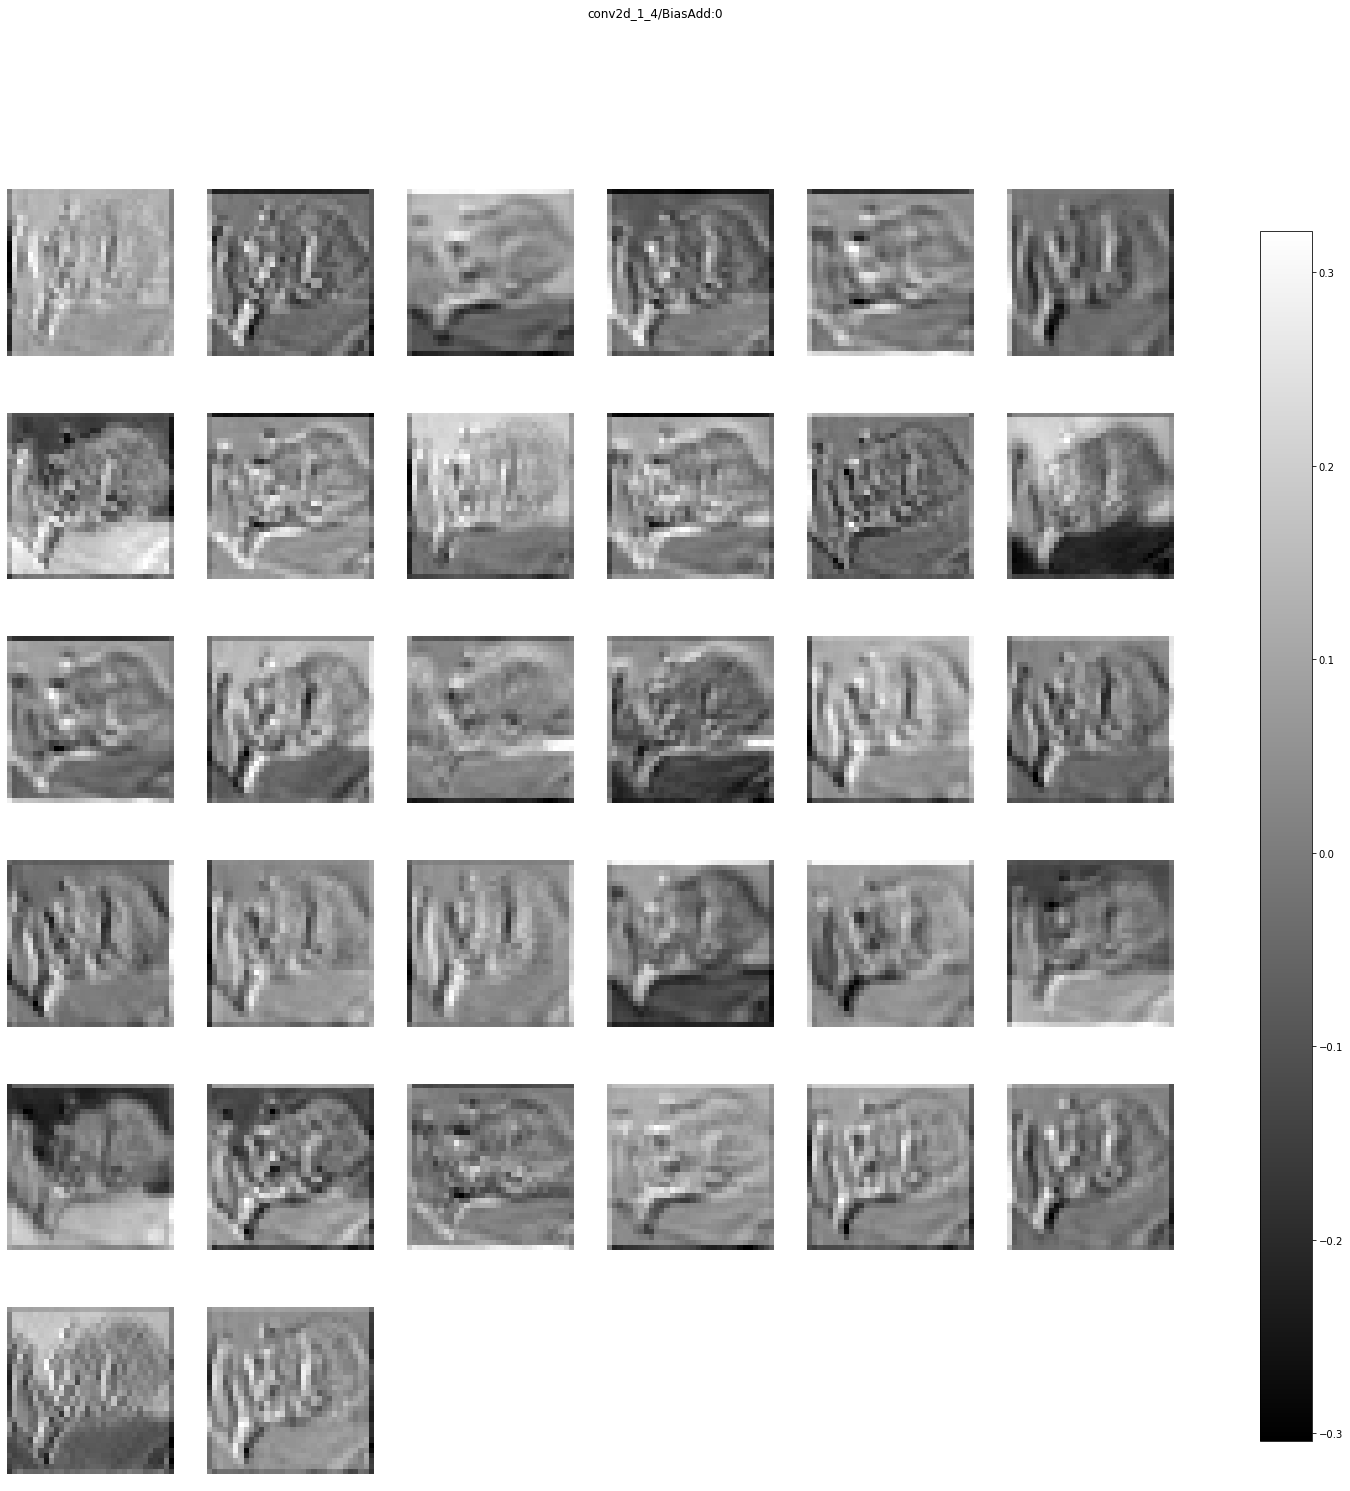

activation_1_4/Relu:0 (1, 32, 32, 32) 


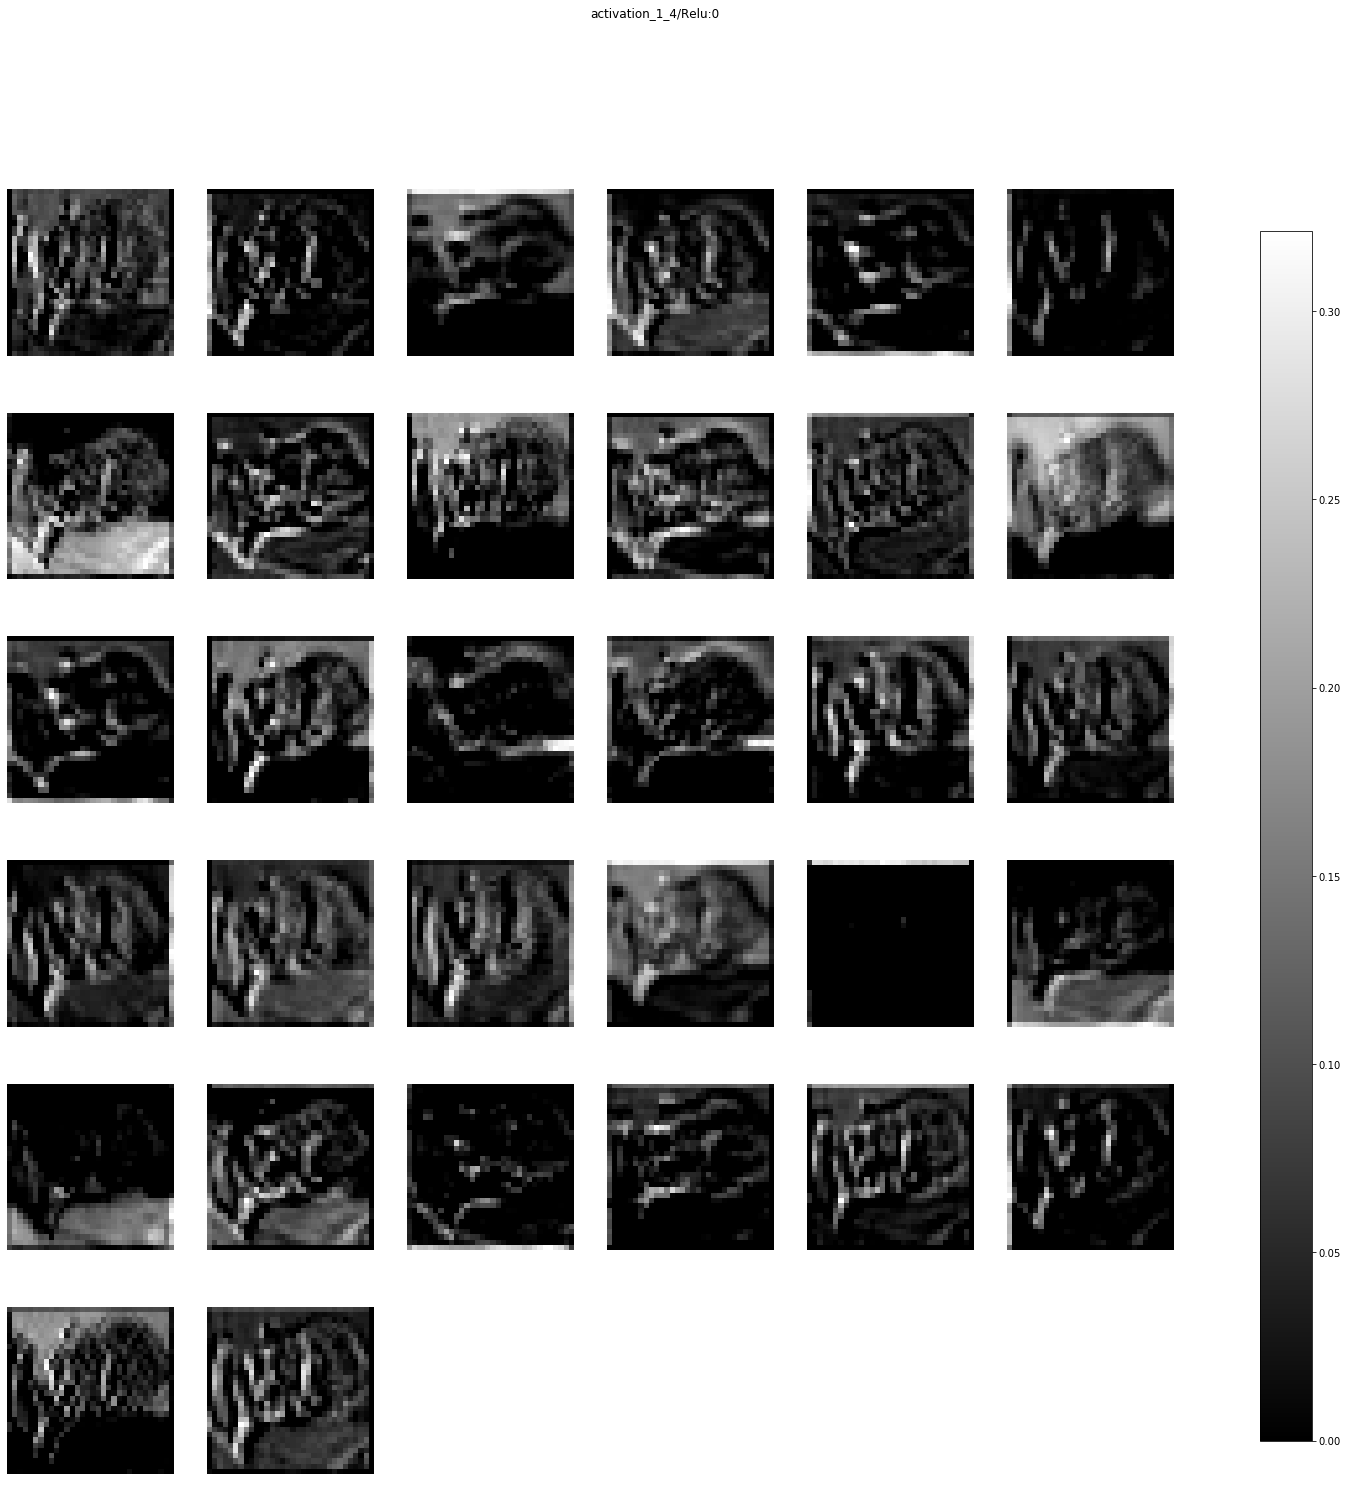

conv2d_2_4/BiasAdd:0 (1, 30, 30, 32) 


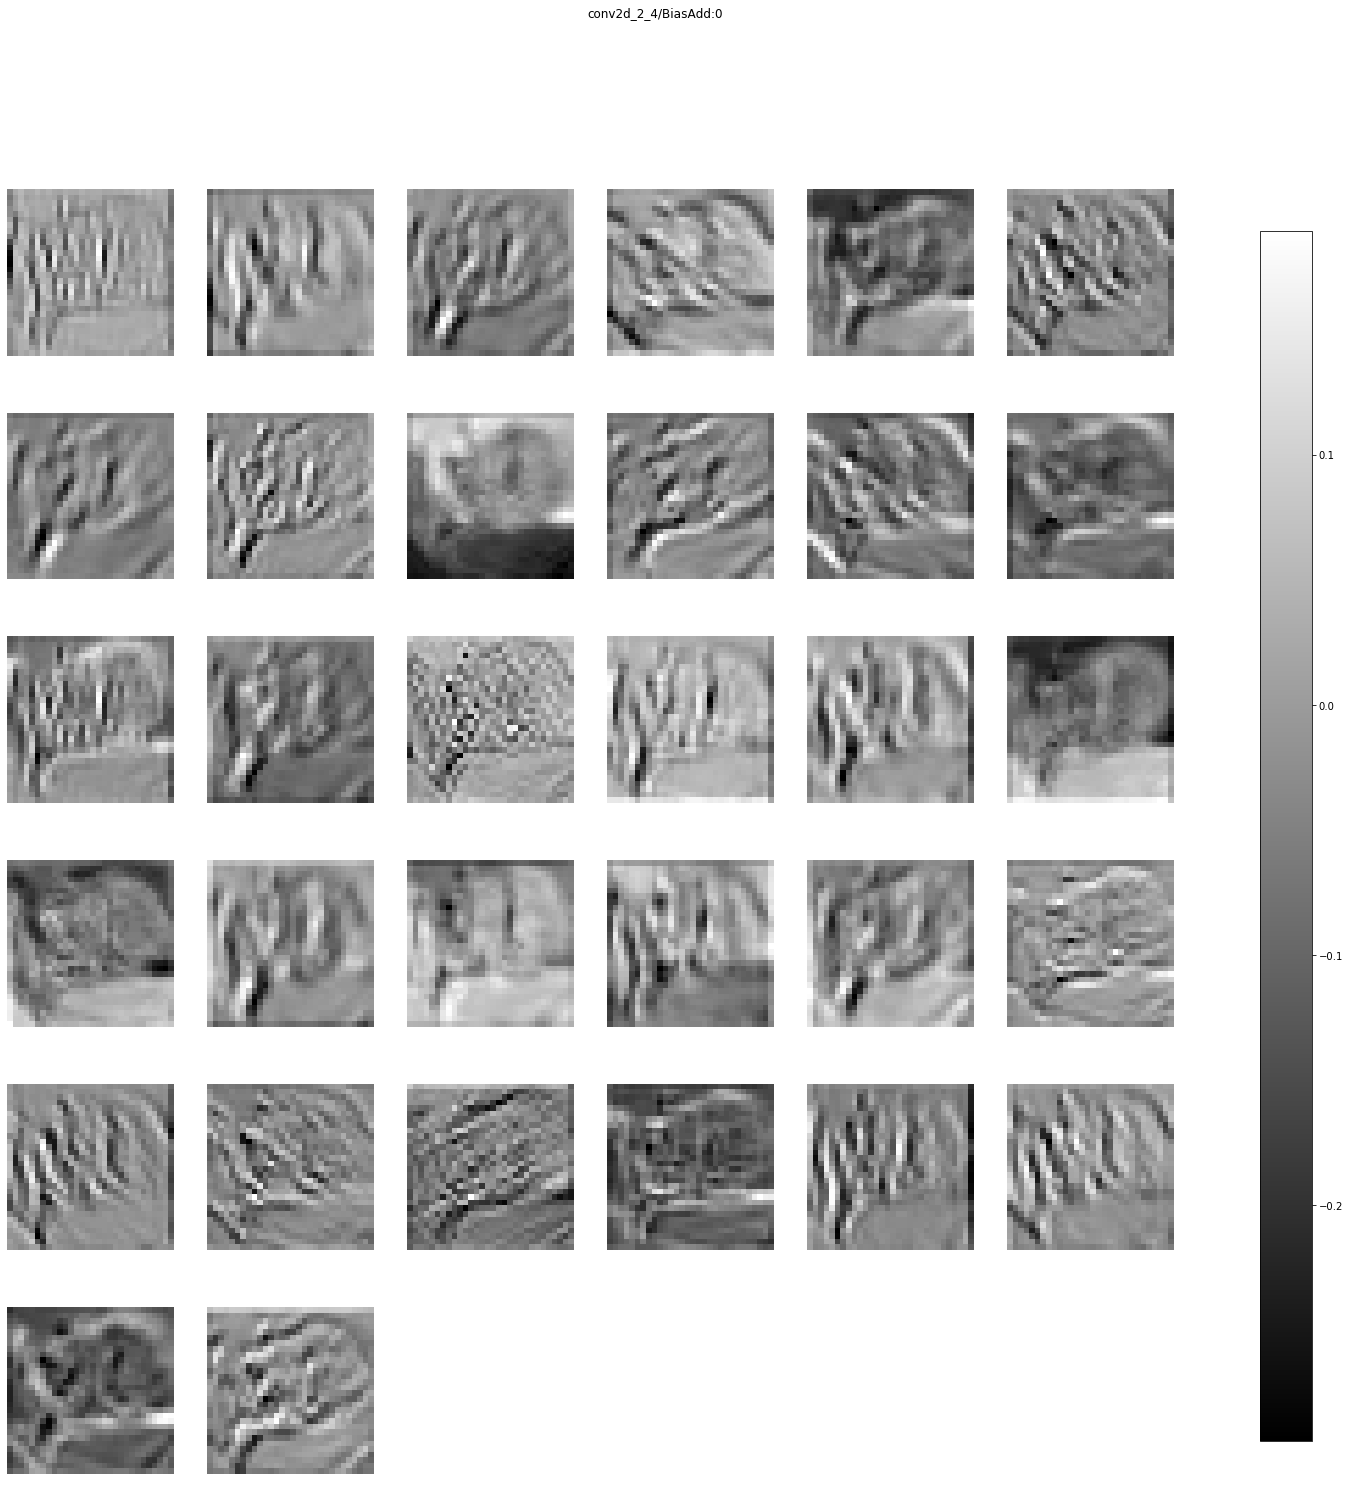

activation_2_4/Relu:0 (1, 30, 30, 32) 


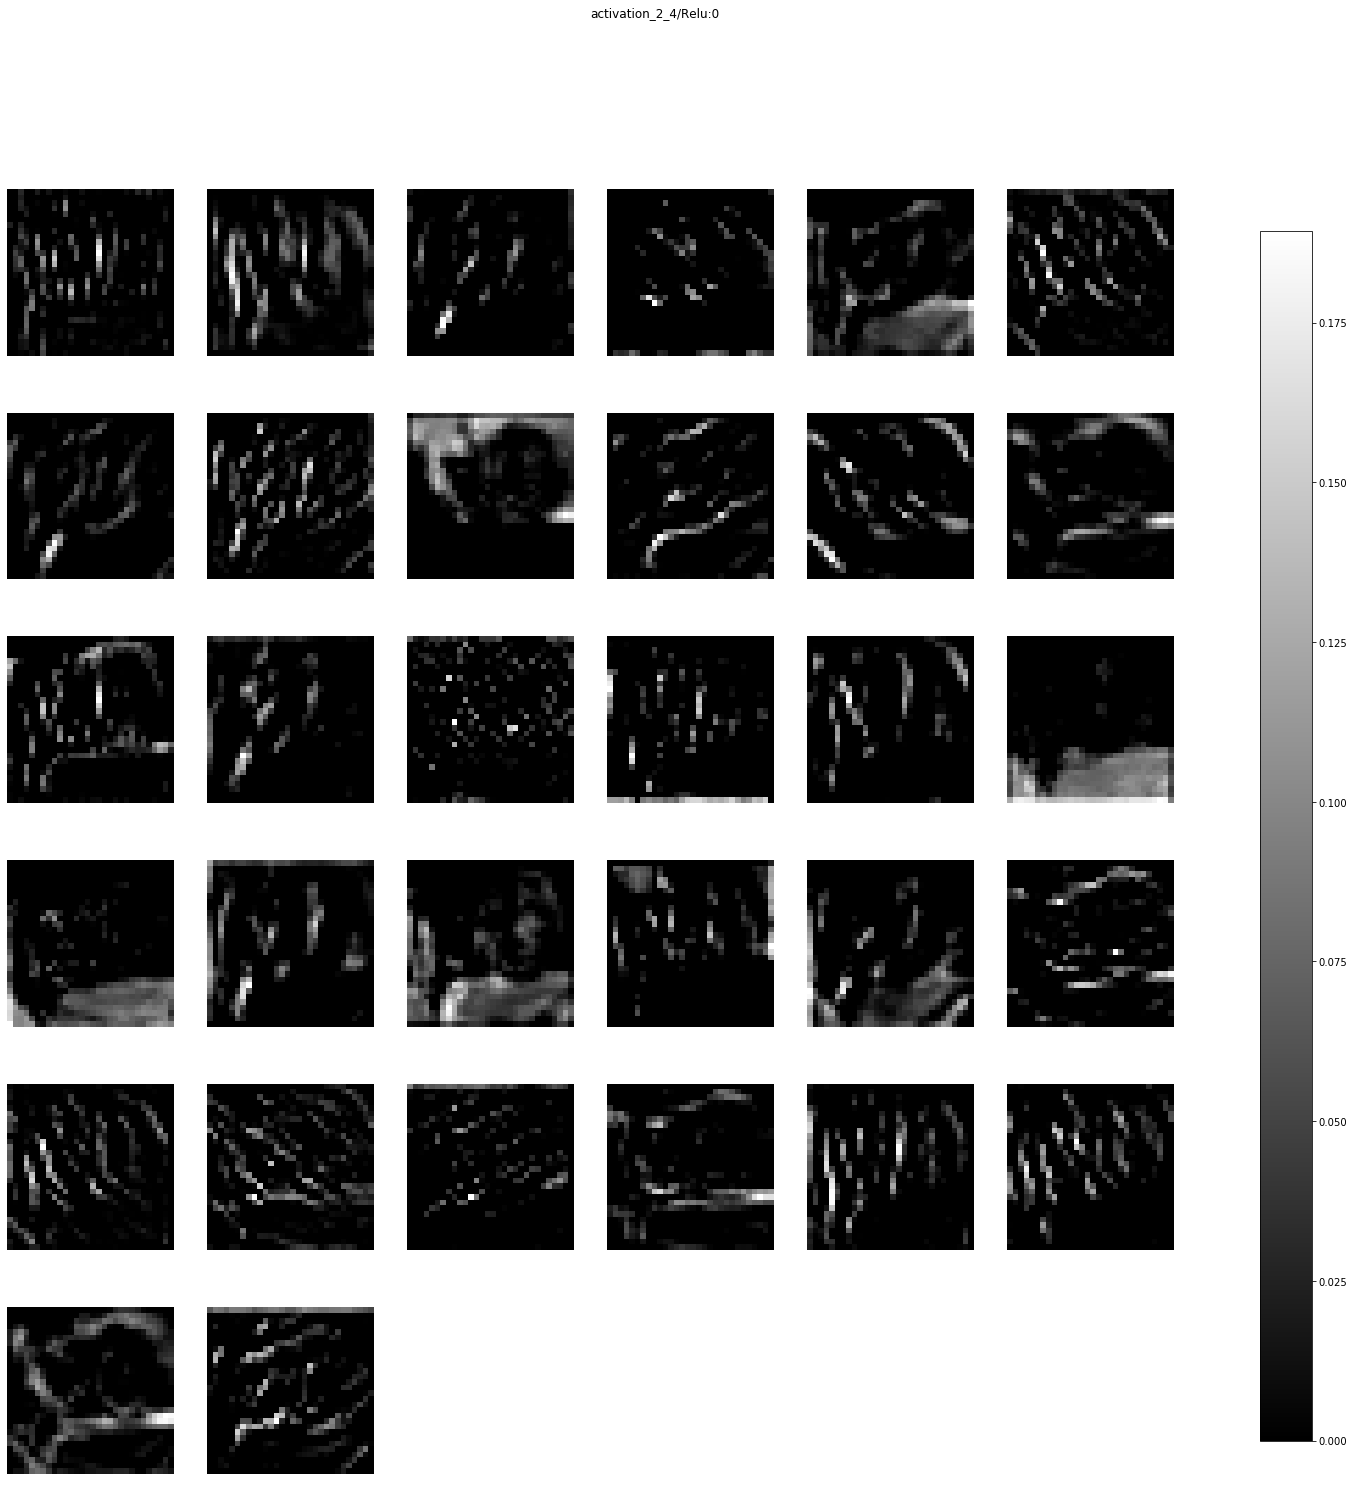

max_pooling2d_1_4/MaxPool:0 (1, 15, 15, 32) 


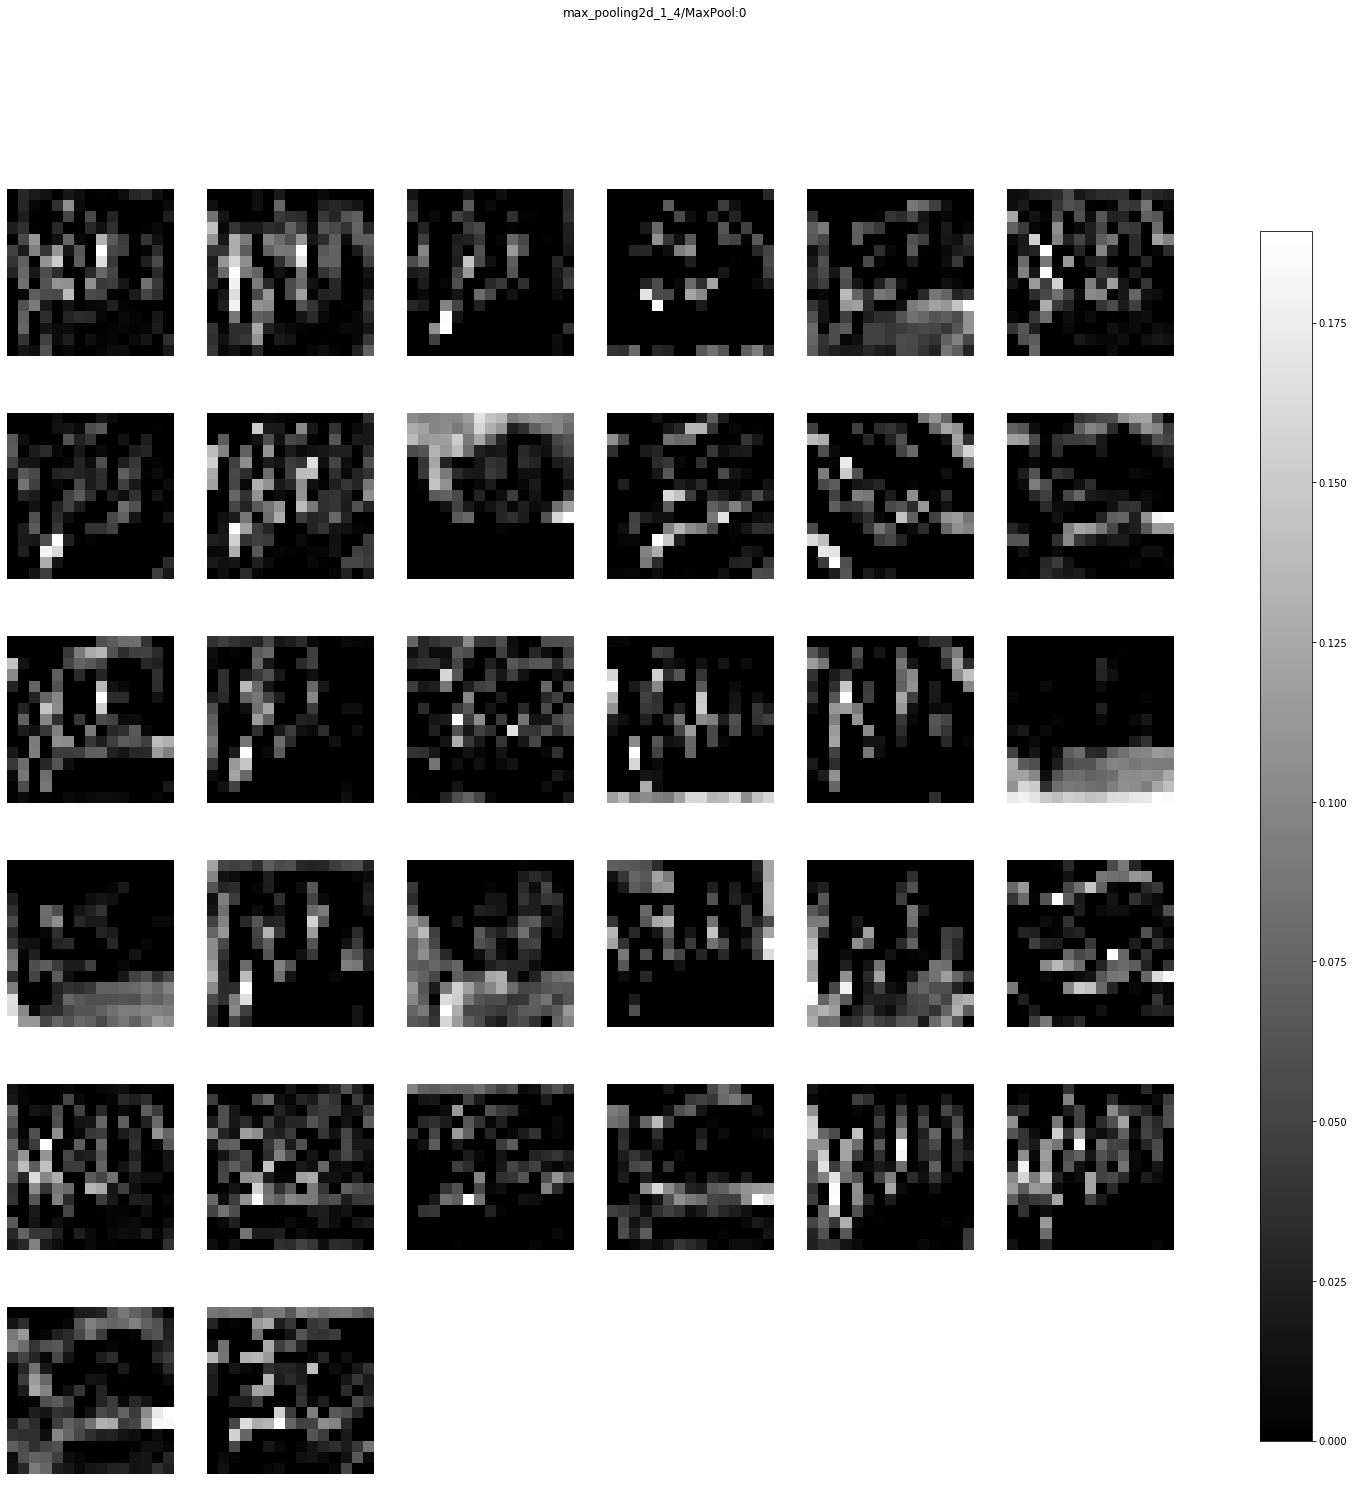

dropout_1_4/cond/Merge:0 (1, 15, 15, 32) 


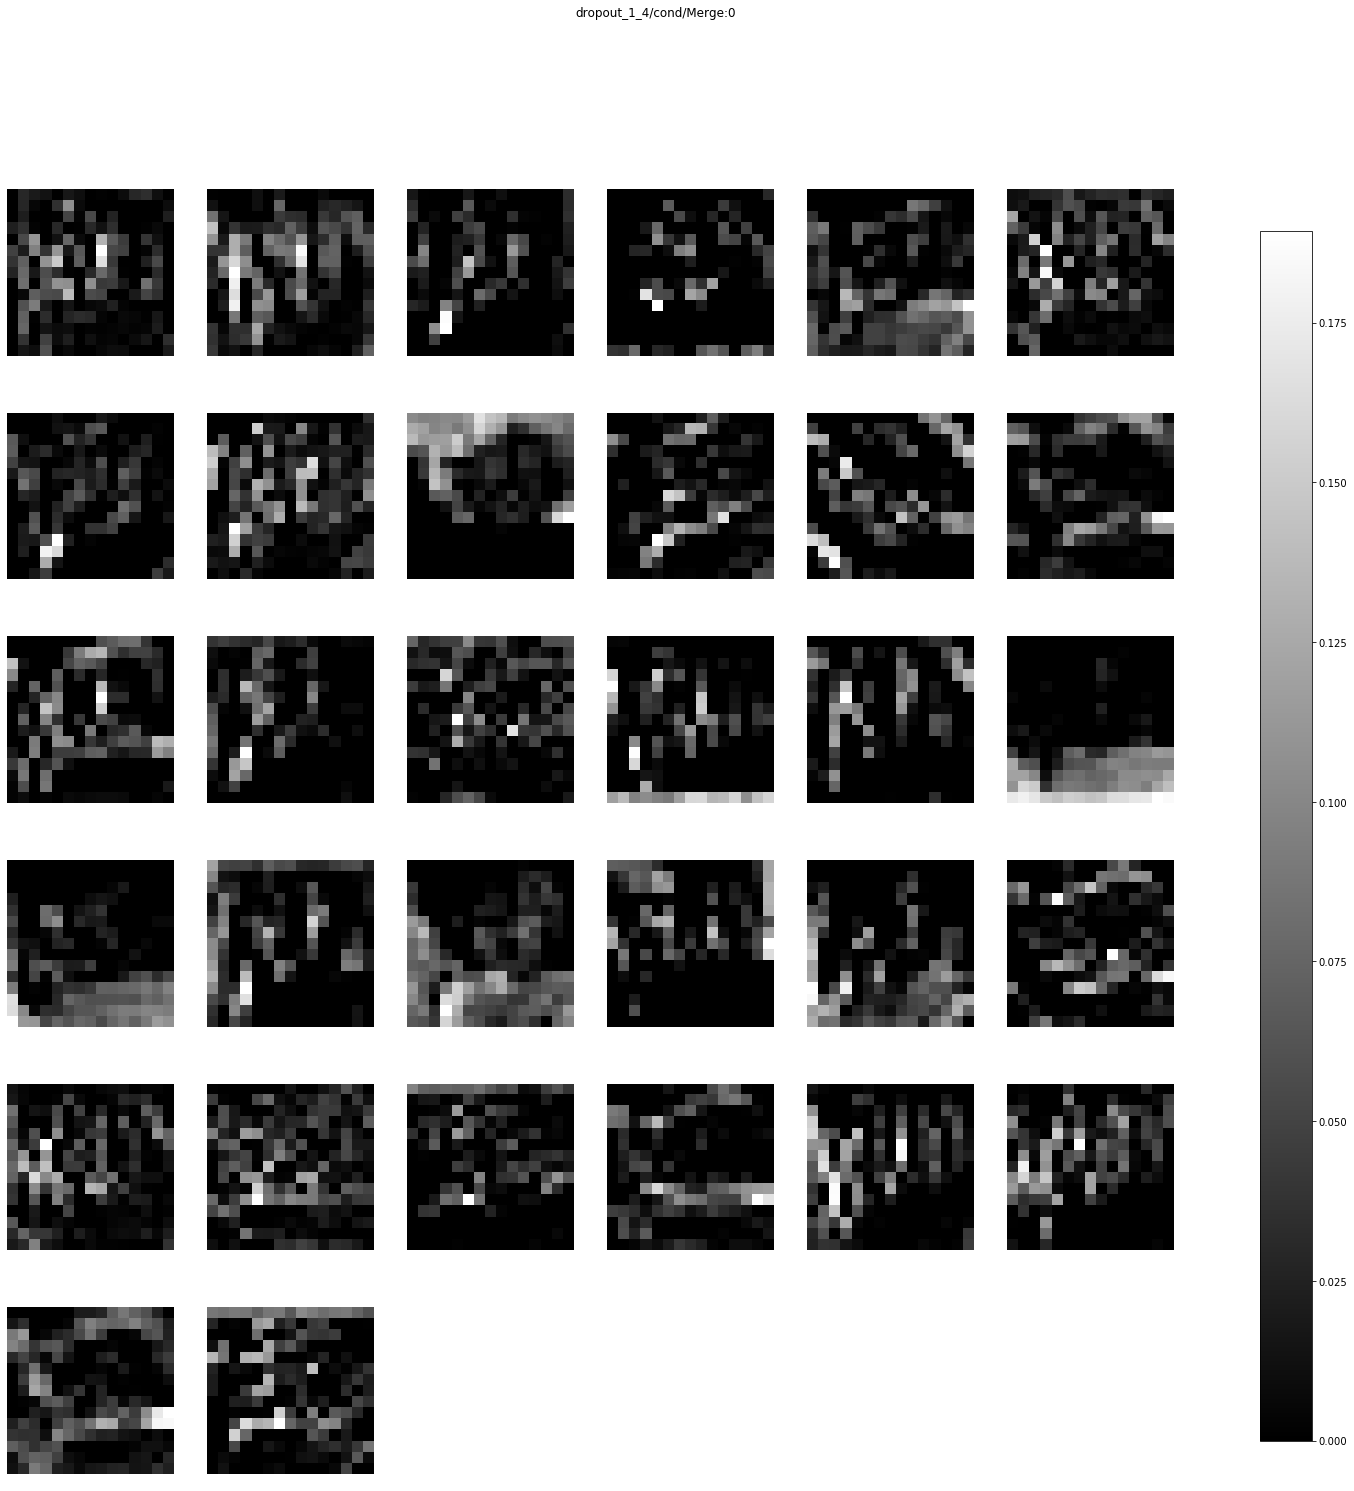

conv2d_3_4/BiasAdd:0 (1, 15, 15, 64) 


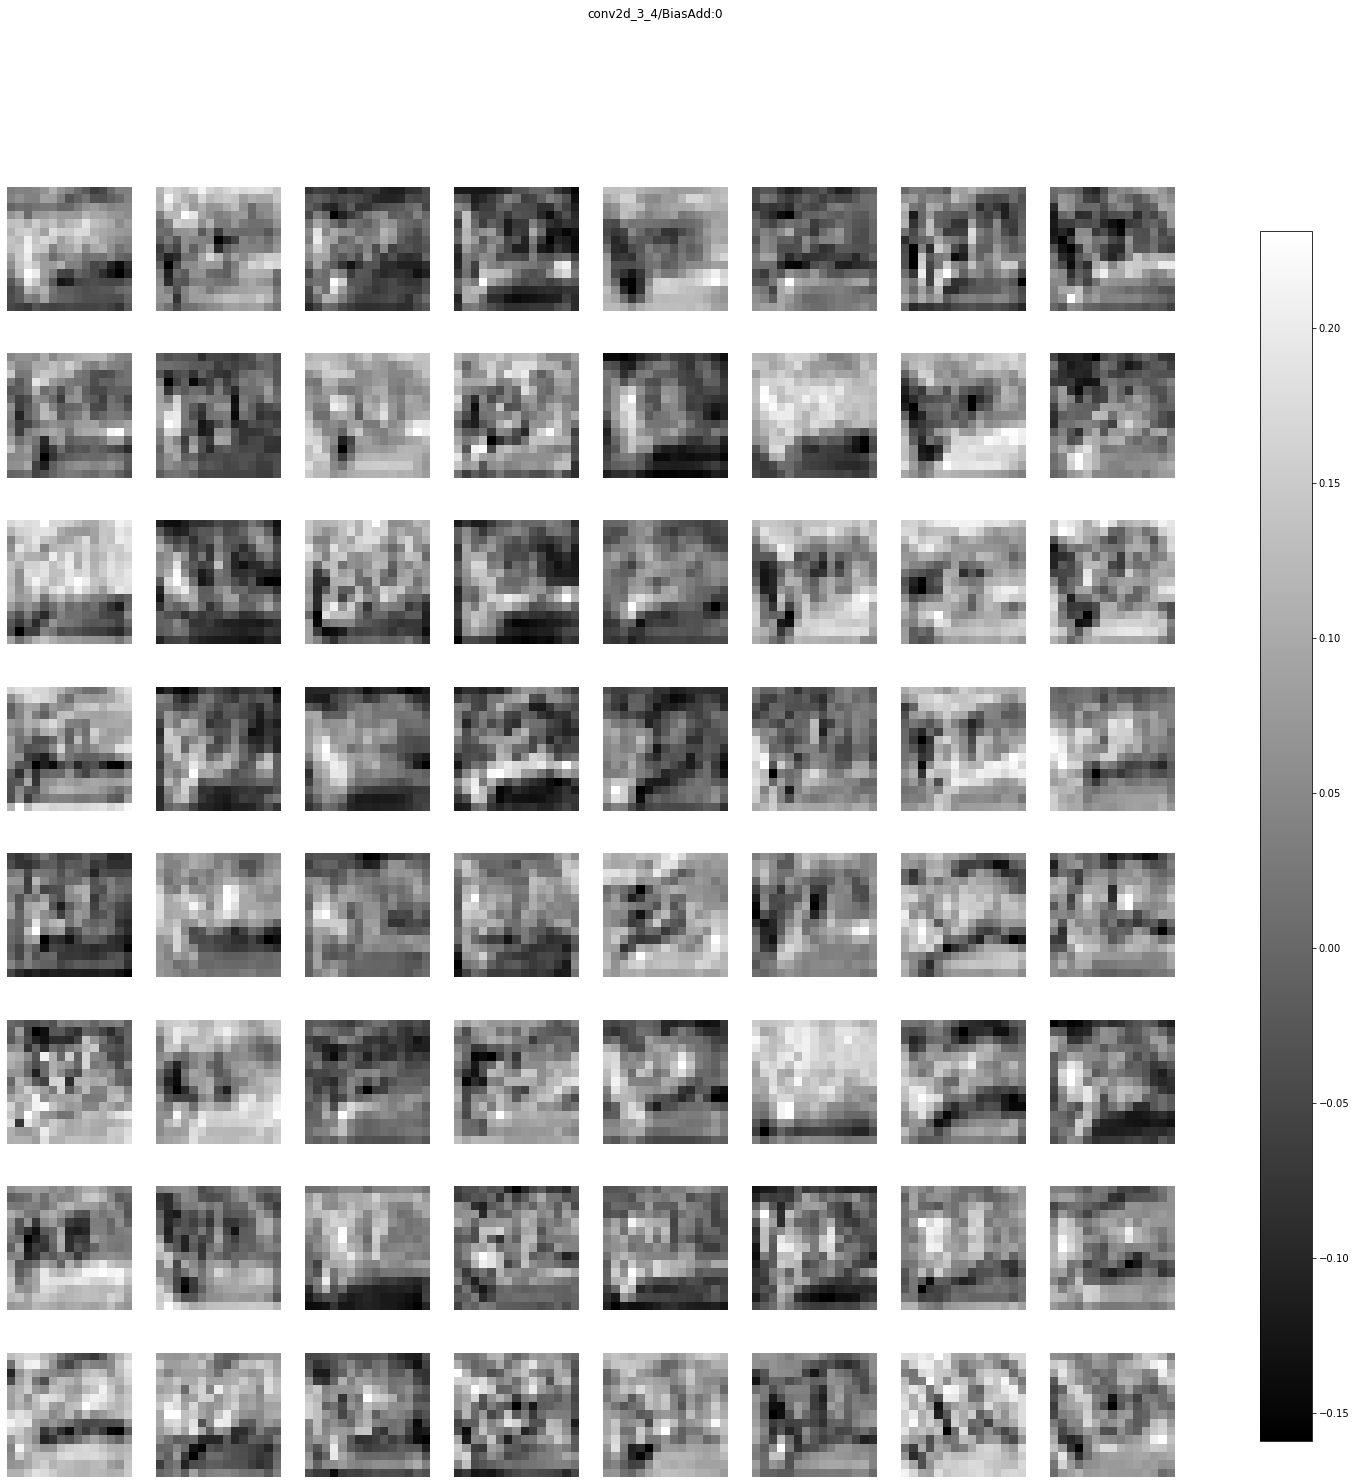

activation_3_4/Relu:0 (1, 15, 15, 64) 


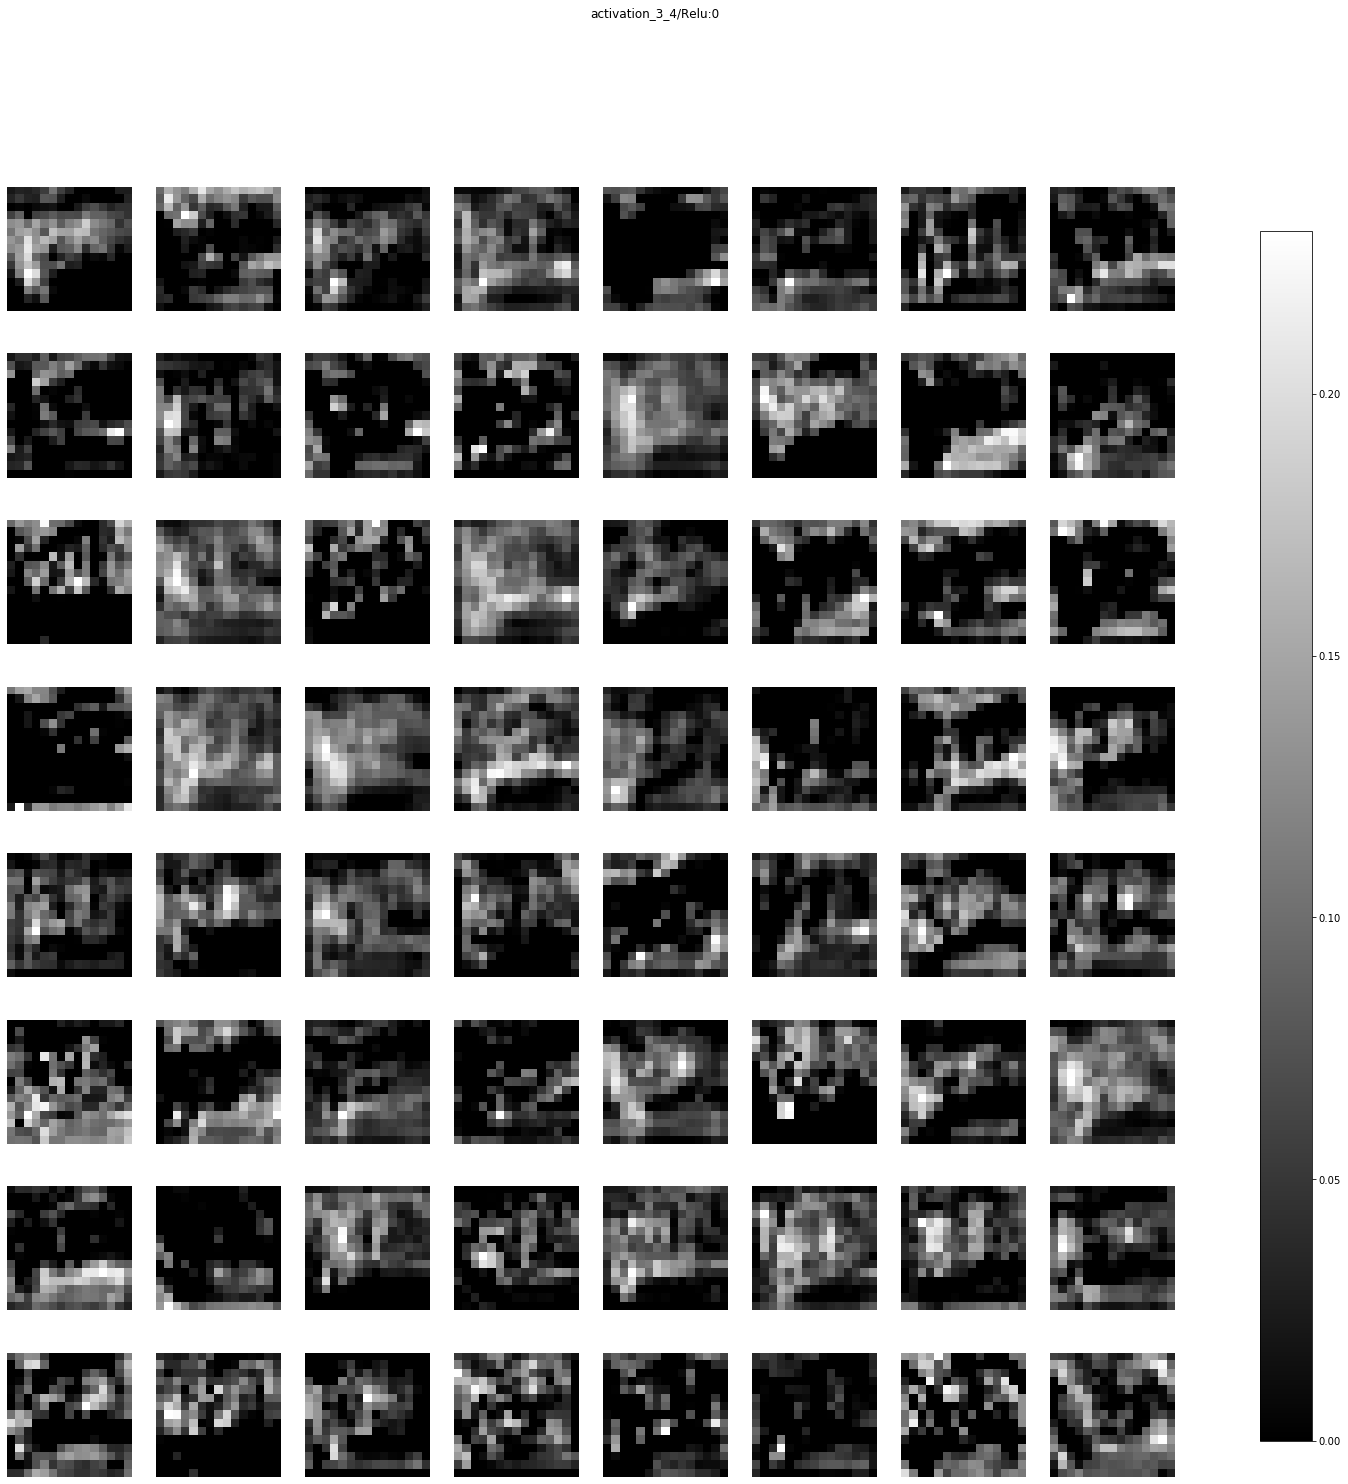

conv2d_4_4/BiasAdd:0 (1, 13, 13, 64) 


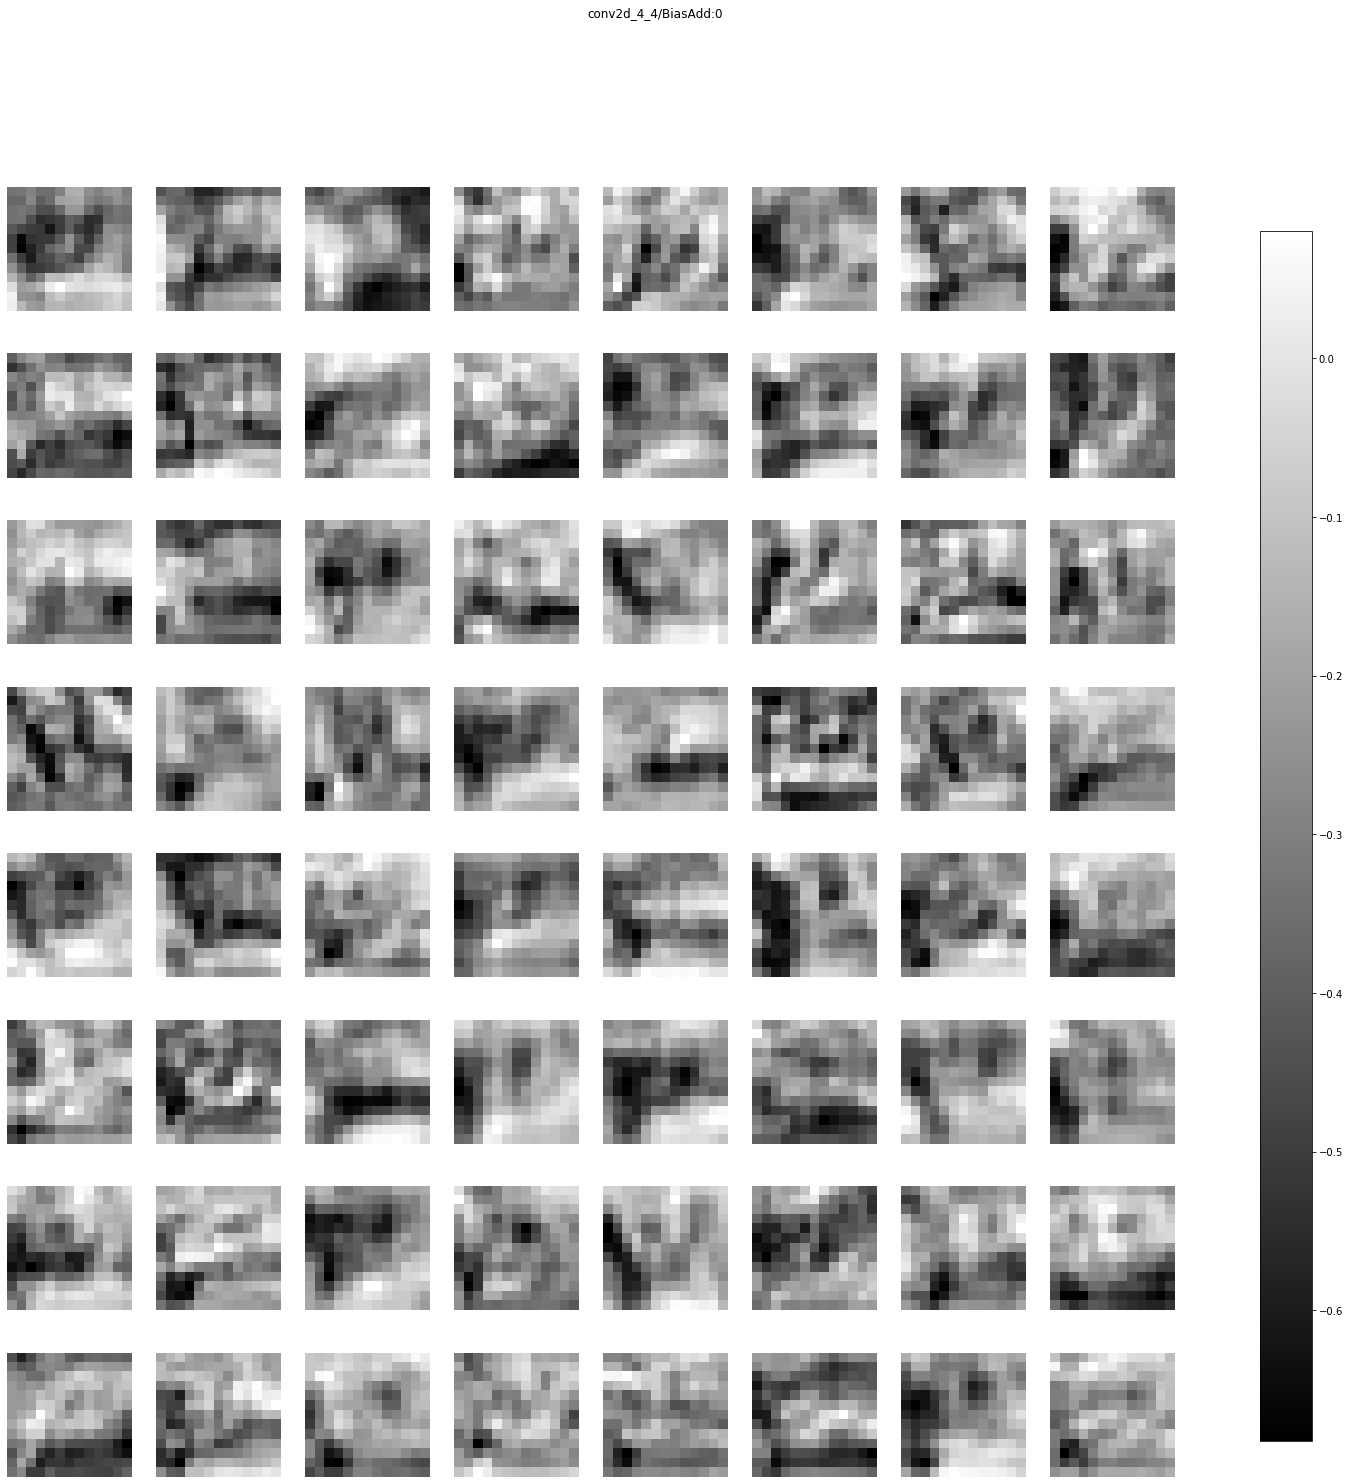

activation_4_4/Relu:0 (1, 13, 13, 64) 


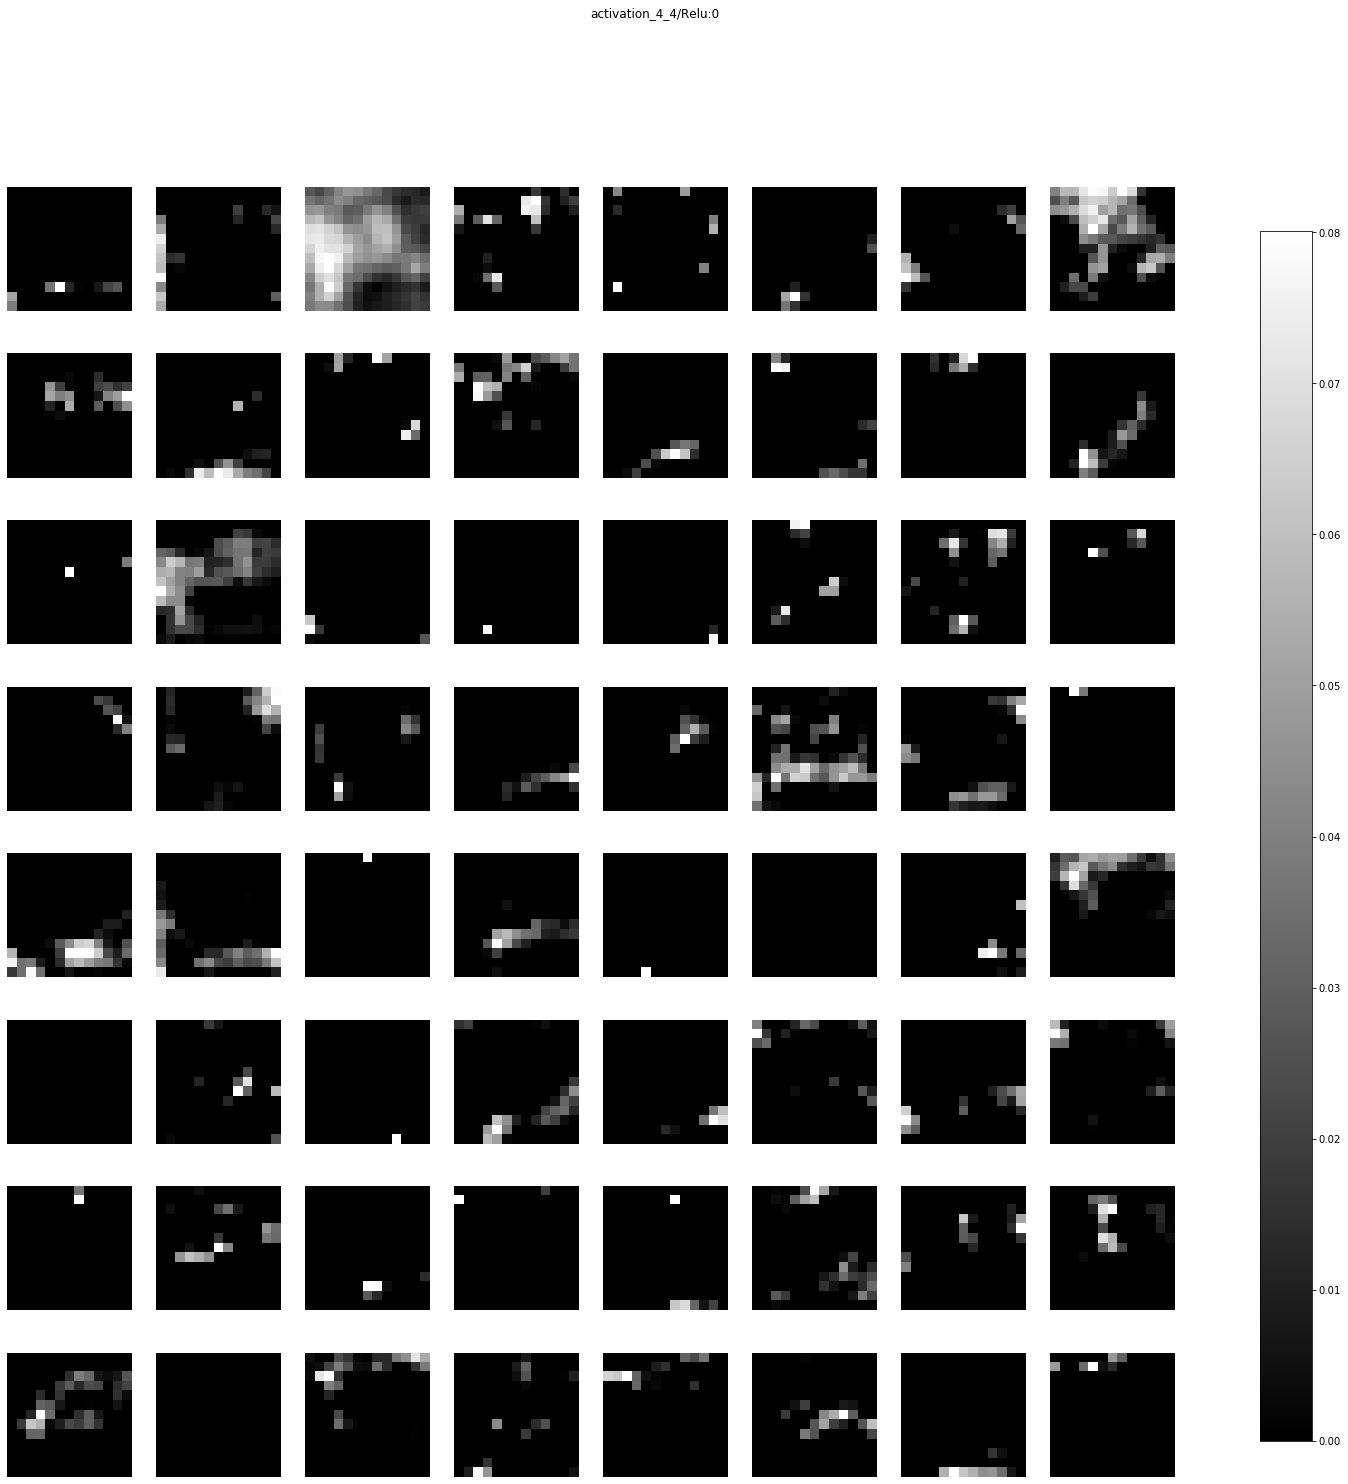

max_pooling2d_2_4/MaxPool:0 (1, 6, 6, 64) 


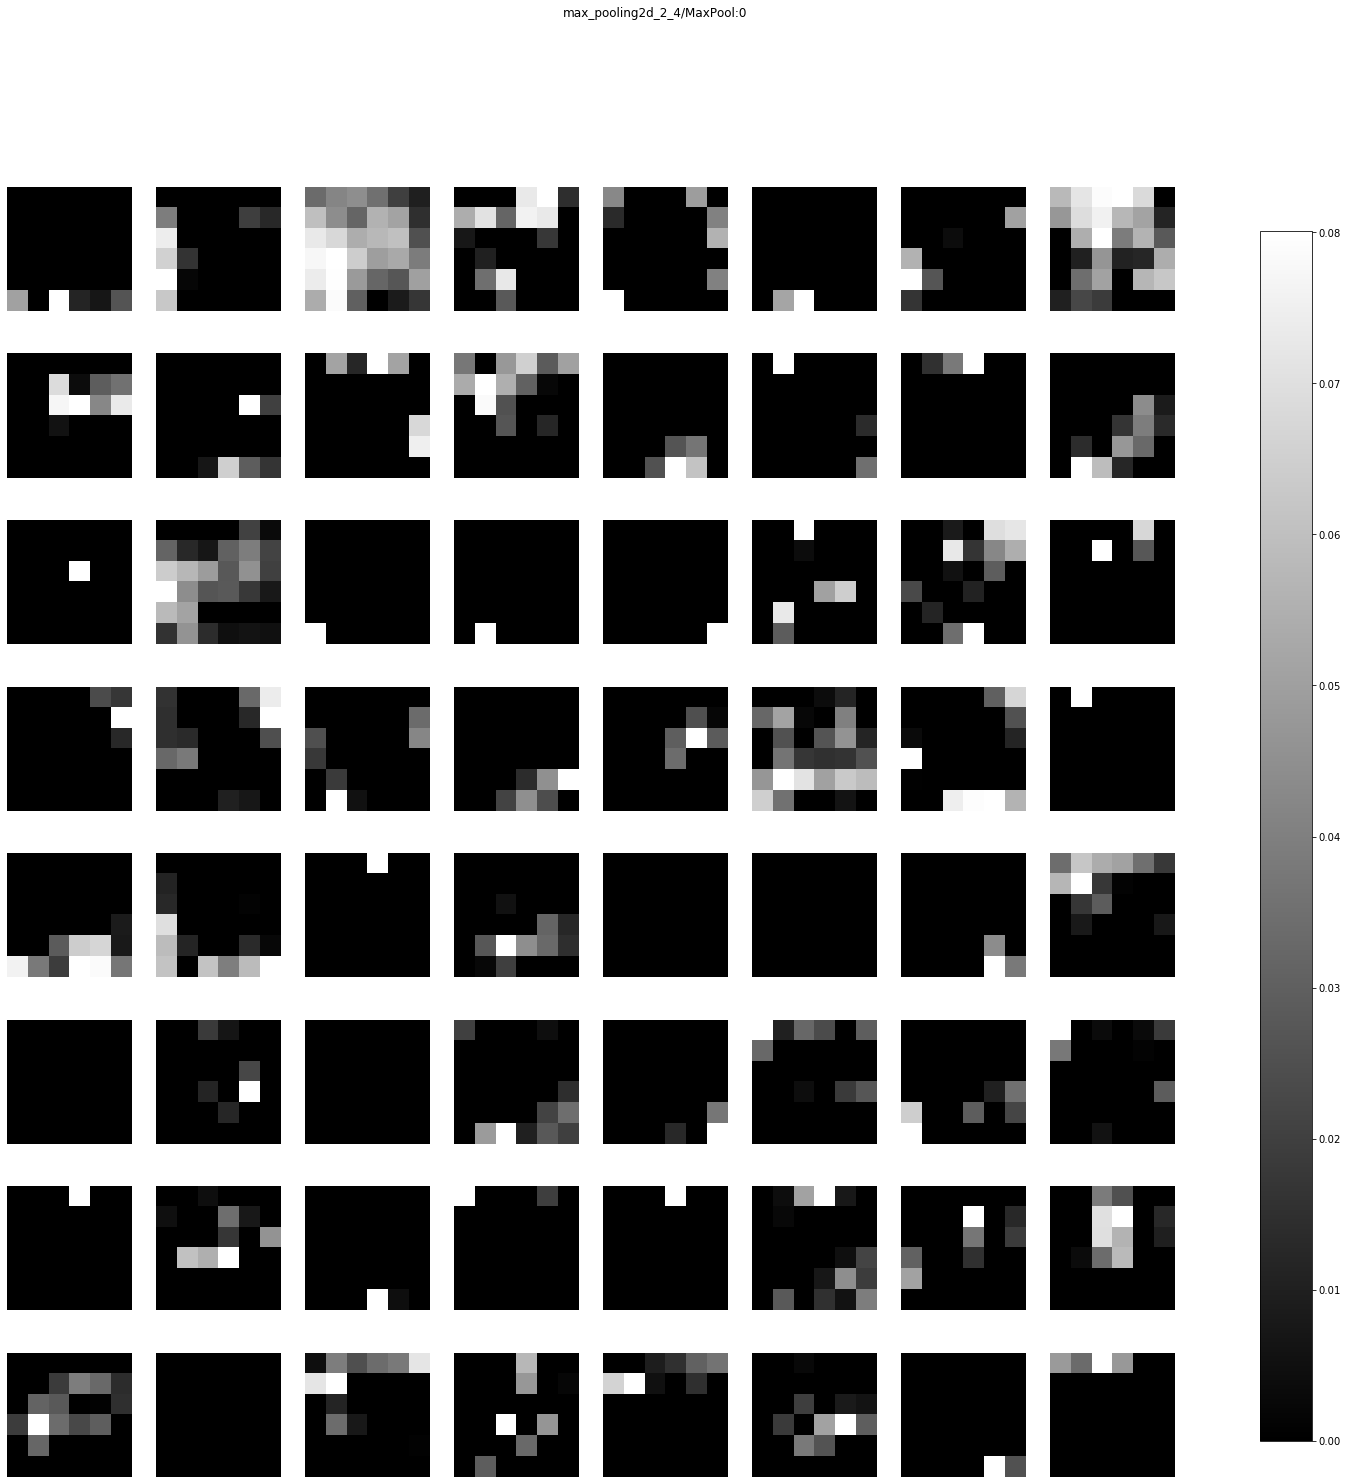

dropout_2_4/cond/Merge:0 (1, 6, 6, 64) 


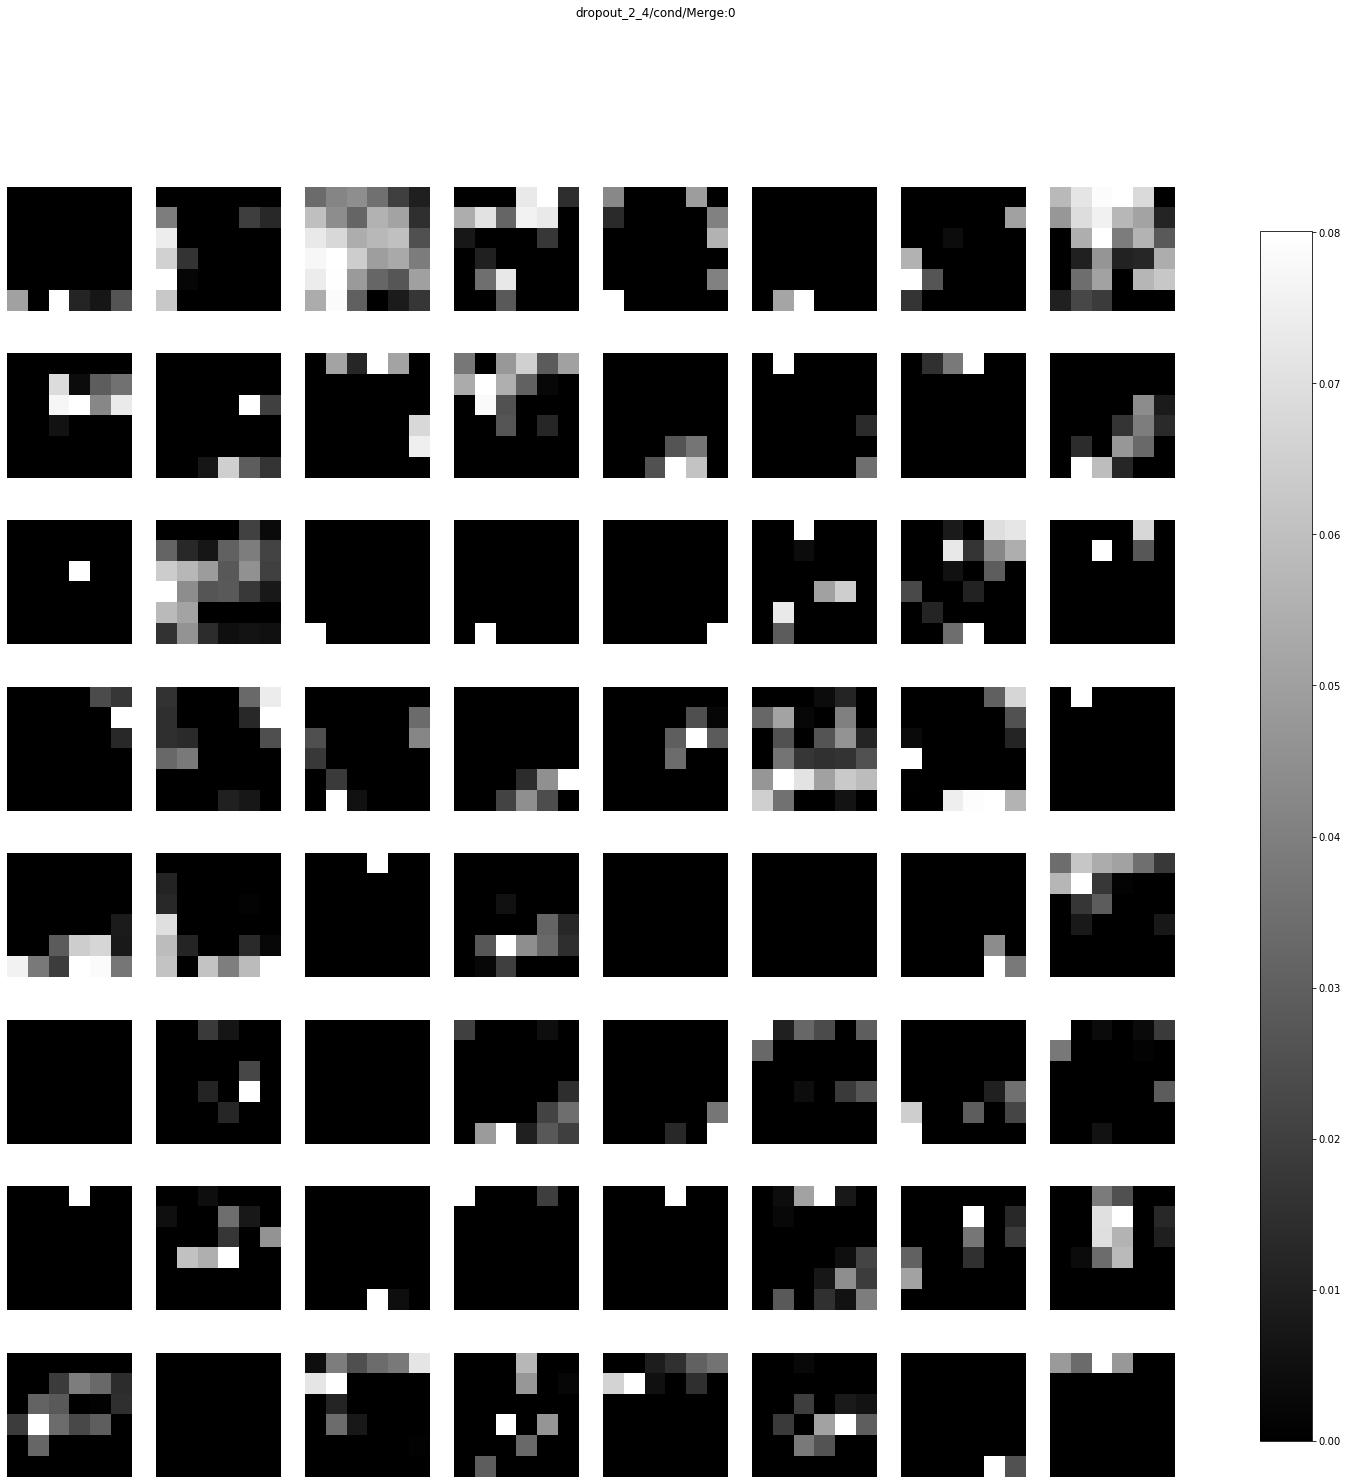

flatten_1_4/Reshape:0 (1, 2304) 


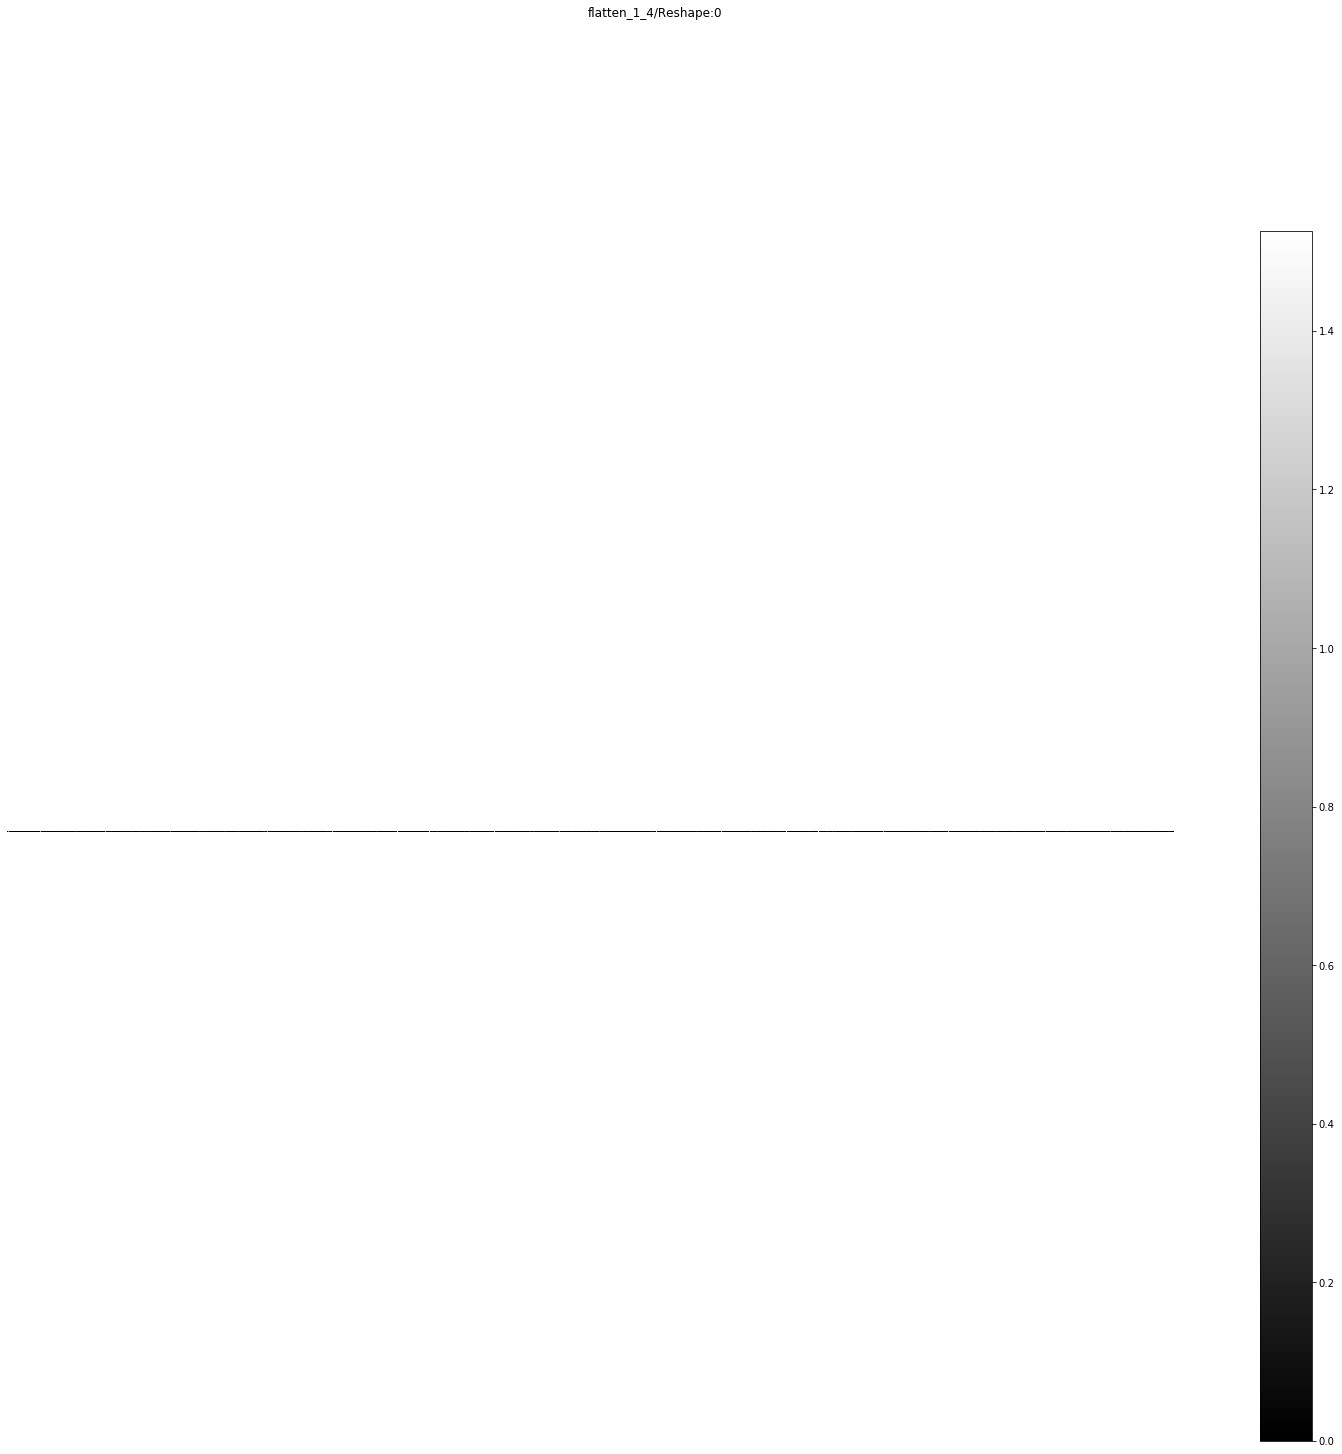

dense_1_4/BiasAdd:0 (1, 512) 


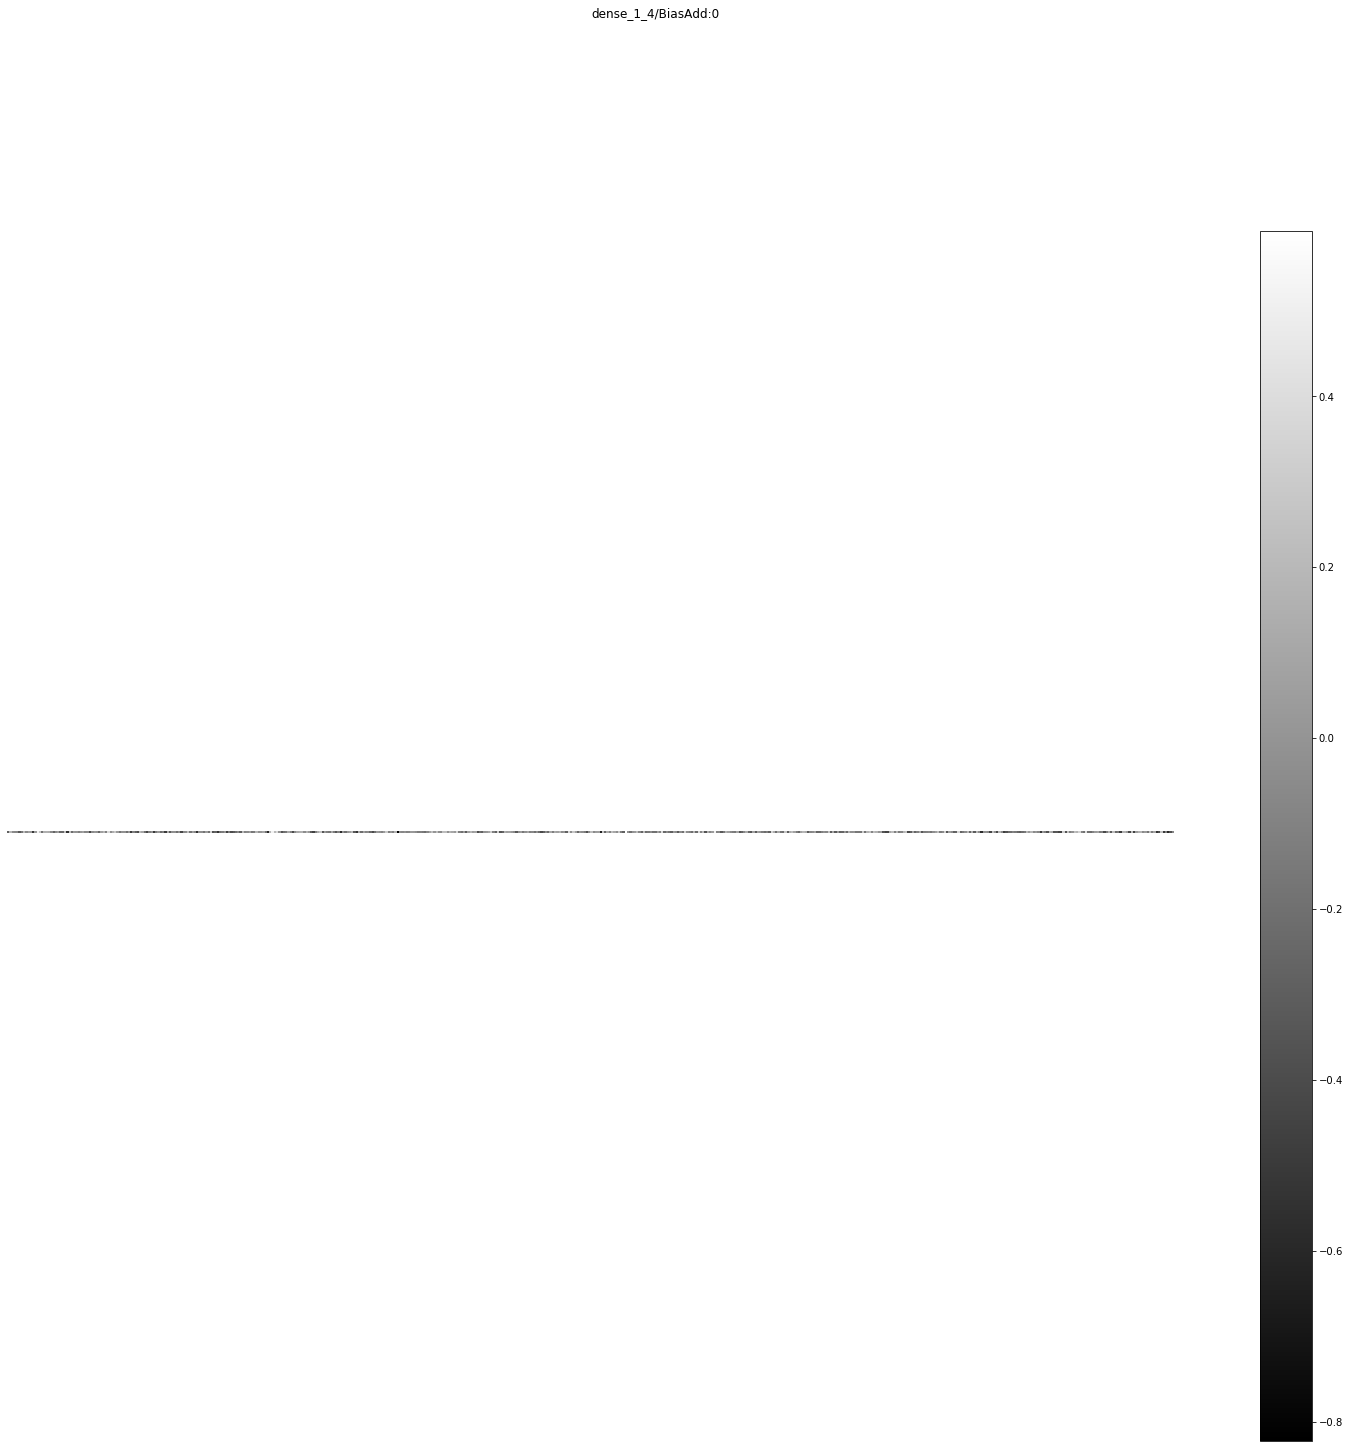

activation_5_4/Relu:0 (1, 512) 


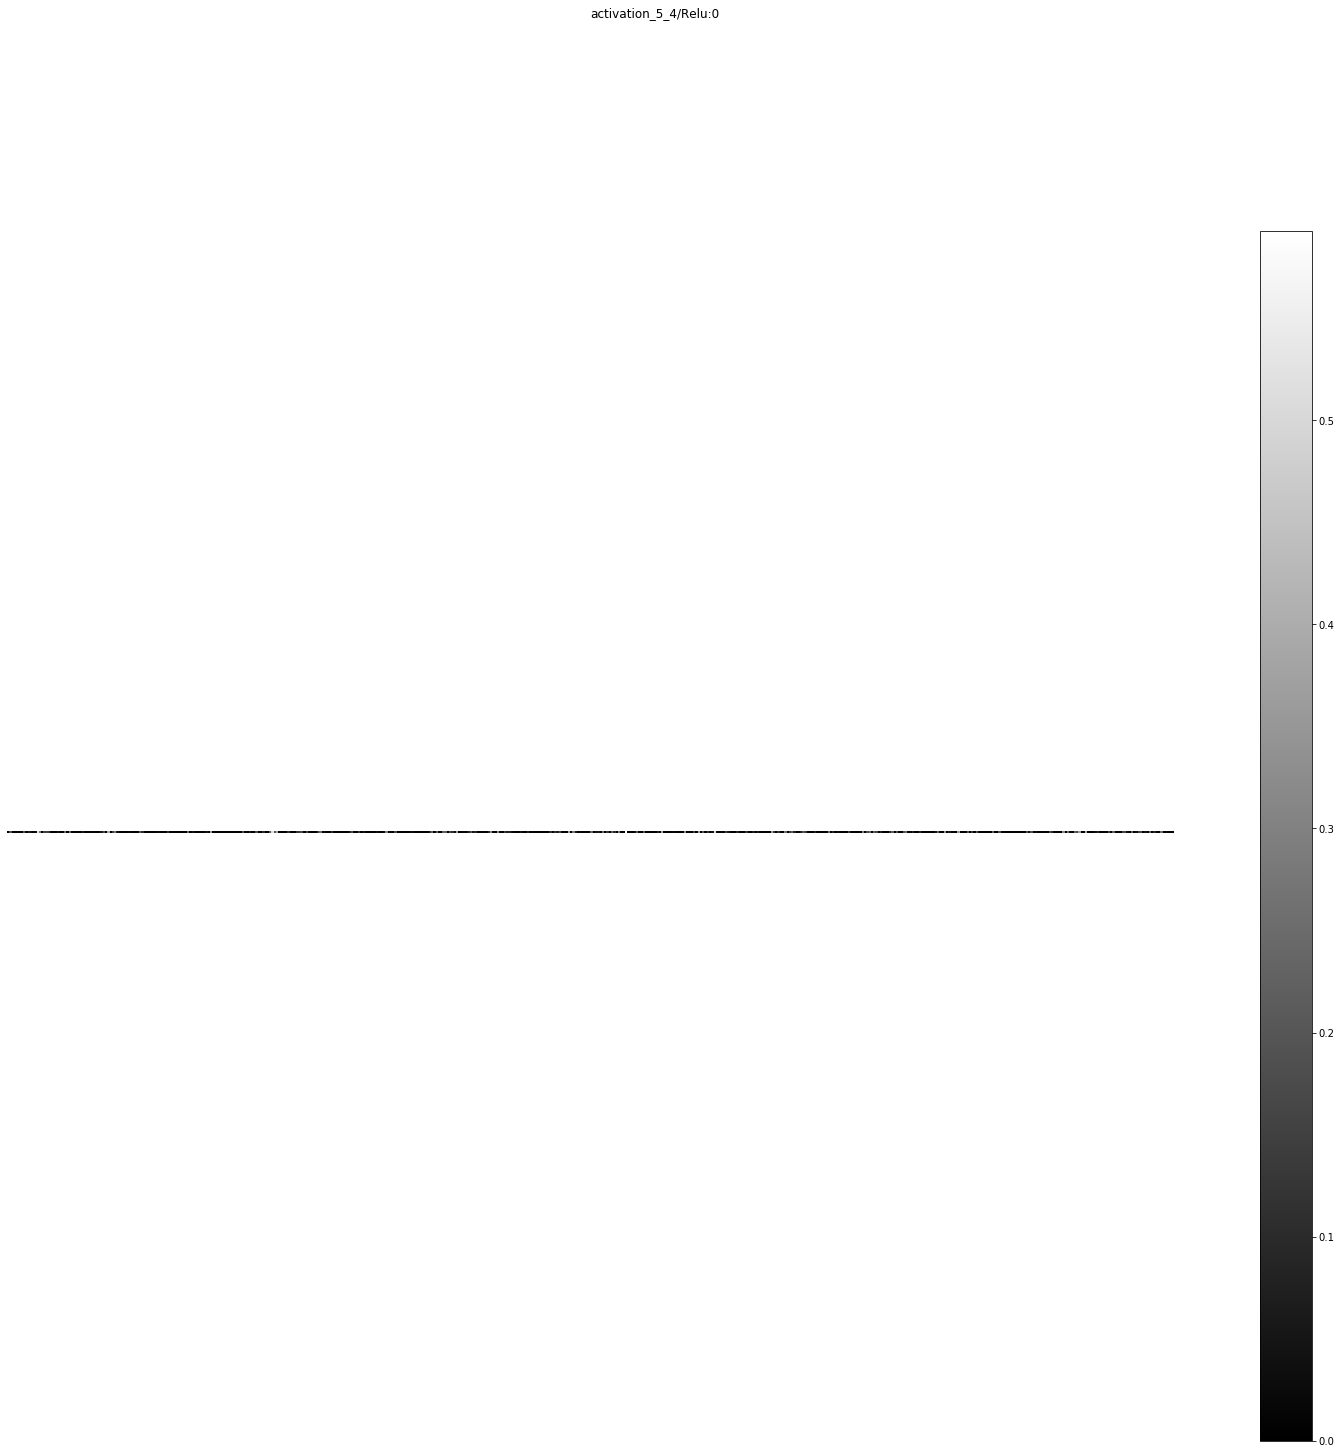

dropout_3_4/cond/Merge:0 (1, 512) 


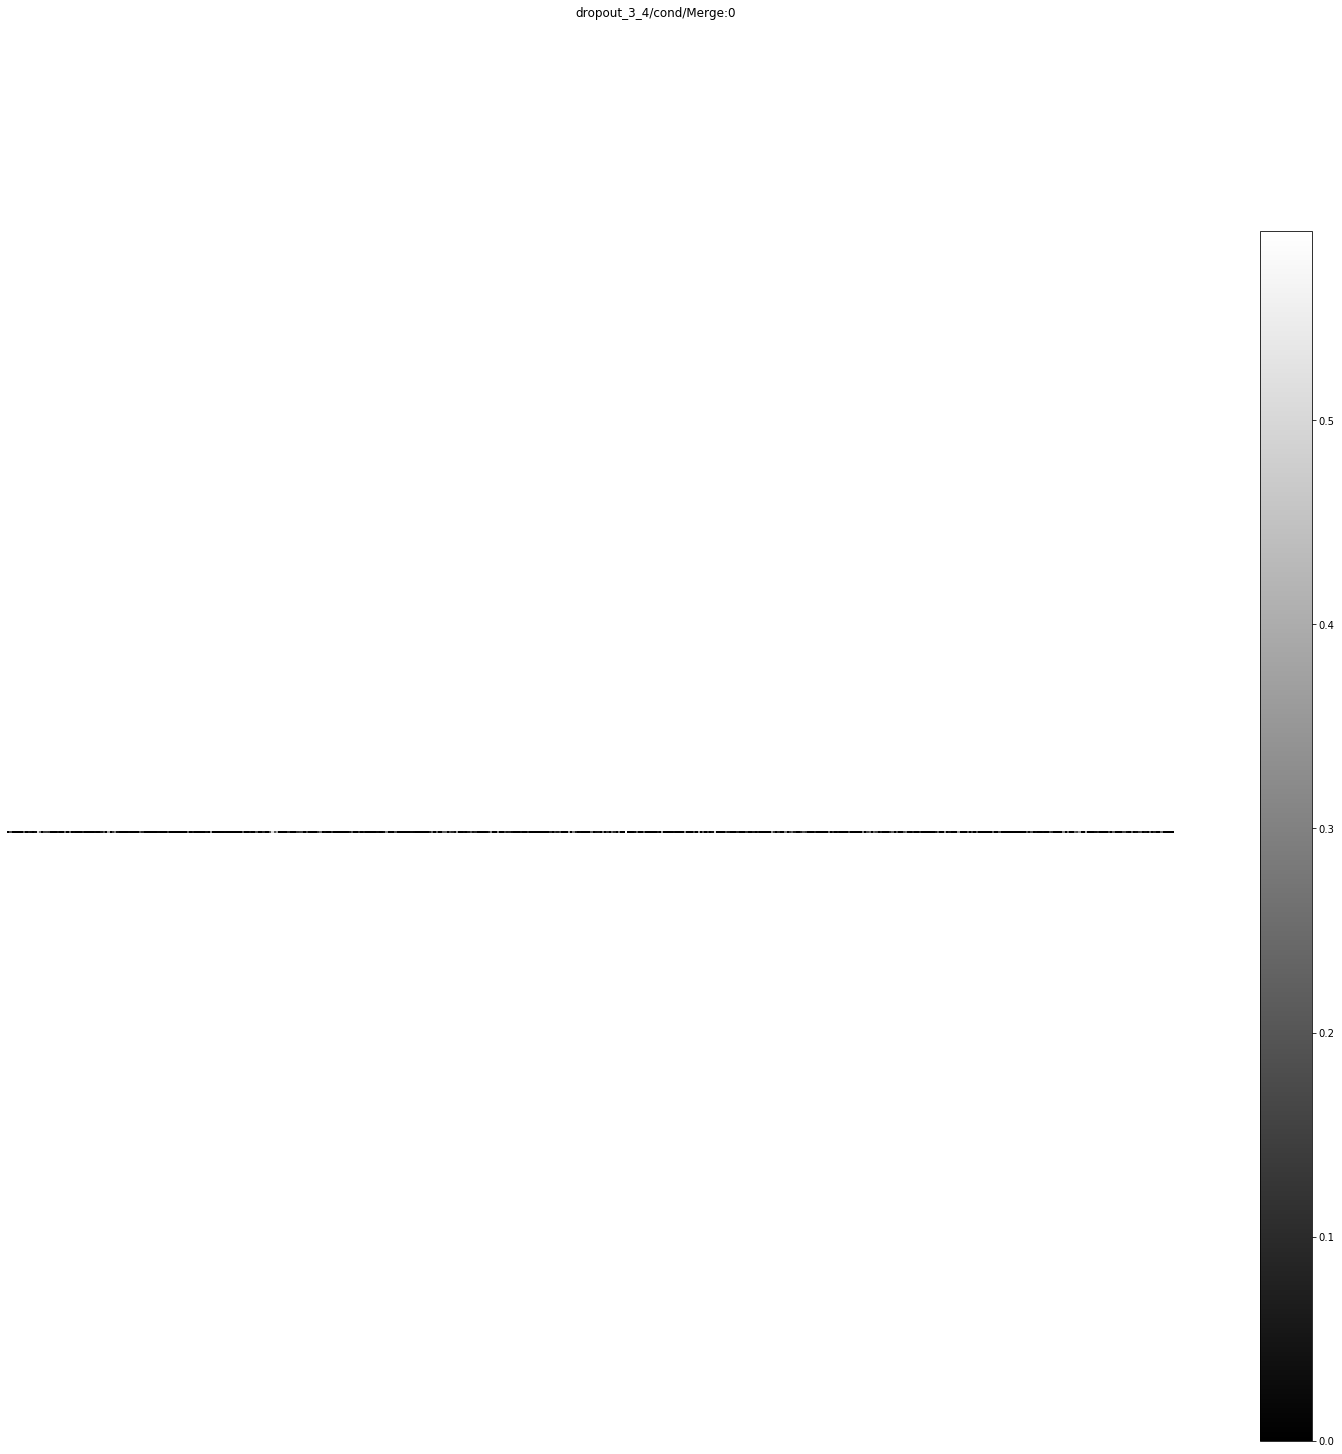

predictions_4/BiasAdd:0 (1, 10) 


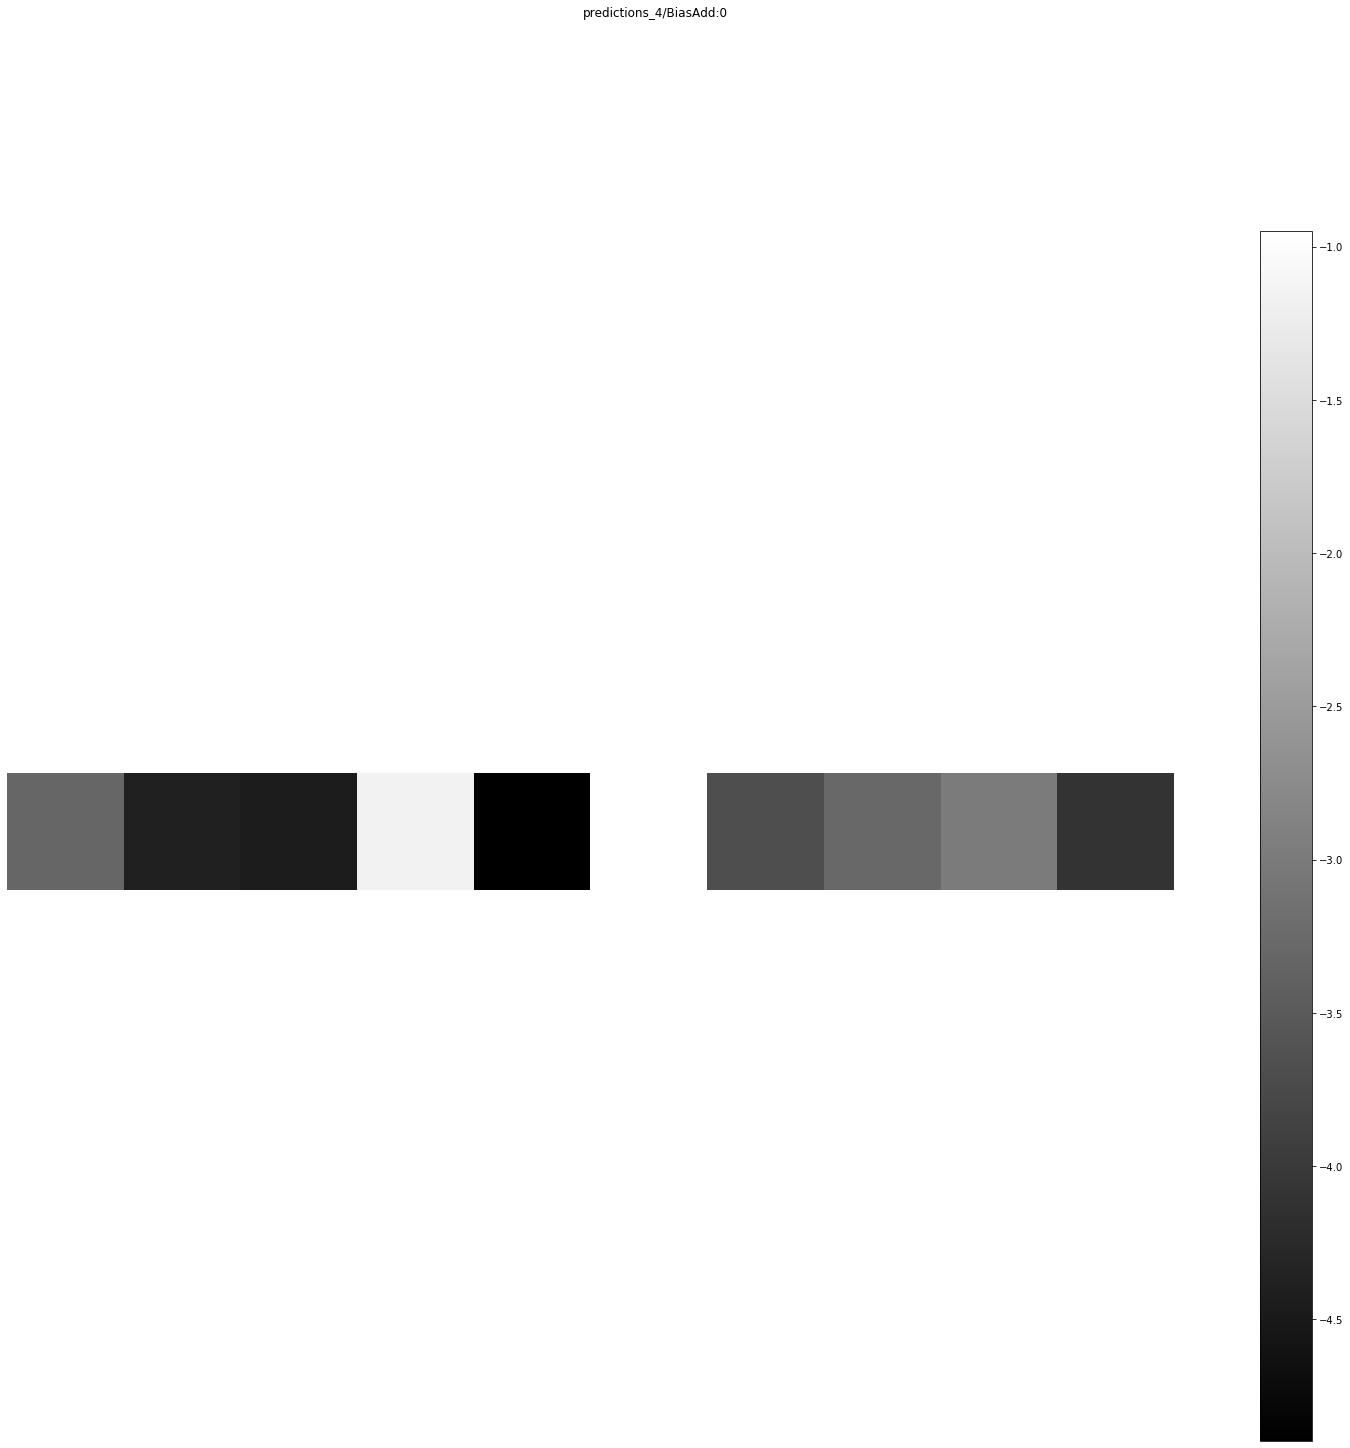

In [5]:
# =============================================
# Keract visualizations
# =============================================

from keract import get_activations, display_activations
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

keract_inputs = x_test[:1]
plt.imshow(x_test[0])

keract_inputs.shape
# call to fetch the activations of the model.
# activations = get_activations(model, np.expand_dims(keract_inputs[0], axis=0))
activations = get_activations(model, keract_inputs)
display_activations(activations, cmap="gray", save=False)